# Importing the Libraries, Reading and Displaying the Data Set

In [485]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pprint as pp
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from factor_analyzer import FactorAnalyzer
dataset = pd.read_csv(r"Downloads/Dataset Folder/Patient Treatment Classification/data-ori.csv")
pd.options.display.max_columns =12
pd.options.display.max_rows = 10
display(dataset)

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0        35.1          11.8         4.65         6.3         310      25.4   
1        43.5          14.8         5.39        12.7         334      27.5   
2        33.5          11.3         4.74        13.2         305      23.8   
3        39.1          13.7         4.98        10.5         366      27.5   
4        30.9           9.9         4.23        22.1         333      23.4   
...           ...           ...          ...        ...          ...   ...   
4407     32.8          10.4         3.49         8.1          72      29.8   
4408     33.7          10.8         3.67         6.7          70      29.4   
4409     33.2          11.2         3.47         7.2         235      32.3   
4410     31.5          10.4         3.15         9.1         187      33.0   
4411     33.5          10.9         3.44         5.8         275      31.7   

      MCHC   MCV   AGE SEX SOURCE  
0     33.6   75.5   1    F   out   
1     34.0   80.7   1    F   out   
2     33.7   70.7   1    F   out   
3     35.0   78.5   1    F   out   
4     32.0   73.0   1    M   out   
...    ...    ...  ...  ..    ...  
4407  31.7   94.0  92    F    in   
4408  32.0   91.8  92    F    in   
4409  33.7   95.7  93    F   out   
4410  33.0  100.0  98    F    in   
4411  32.5   97.4  99    F   out   

[4412 rows x 11 columns]

# Data wrangling

## Converting the Columns Names to Lower Caps

In [486]:
dataset.columns = dataset.columns.str.lower()
dataset.columns

Index(['haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
       'thrombocyte', 'mch', 'mchc', 'mcv', 'age', 'sex', 'source'],
      dtype='object')

## Removing Parantehsis, Quotes and Brackets

In [487]:
def remove_brackets_quotes(dataset, columns=None):
    # If no columns specified, apply to all columns
    if columns is None:
        columns = dataset.columns
    for col in columns:
        # Convert column to string before replacing
        dataset[col] = dataset[col].astype(str).str.replace(r'[\[\]\{\}()\",]', '', regex=True)
    return dataset

# Apply the function to all columns of the DataFrame
df = remove_brackets_quotes(dataset) 
print(df)

     haematocrit haemoglobins erythrocyte leucocyte thrombocyte  mch   mchc  \
0        35.1        11.8         4.65        6.3        310     25.4  33.6   
1        43.5        14.8         5.39       12.7        334     27.5  34.0   
2        33.5        11.3         4.74       13.2        305     23.8  33.7   
3        39.1        13.7         4.98       10.5        366     27.5  35.0   
4        30.9         9.9         4.23       22.1        333     23.4  32.0   
...          ...          ...         ...       ...         ...   ...   ...   
4407     32.8        10.4         3.49        8.1         72     29.8  31.7   
4408     33.7        10.8         3.67        6.7         70     29.4  32.0   
4409     33.2        11.2         3.47        7.2        235     32.3  33.7   
4410     31.5        10.4         3.15        9.1        187     33.0  33.0   
4411     33.5        10.9         3.44        5.8        275     31.7  32.5   

      mcv   age sex source  
0      75.5   1   F   

## Exploring the Data Structure,Columns, Checking for Constant Vaules such -999, Descriptive Stats, Confirming empty or non empty

In [488]:
def explore_data(df):
  print(df.info())  
  print('---------------------------')   
  print("Data Structure")
  print("Data Dimensions:", df.ndim)
  print("Data Shape:", df.shape)
  print("Data Size:", df.size)
  print('---------------------------')  
  print("\n Data Types")
  print(df.dtypes)  

  print("\n Column Names")
  print(list(df.columns))

  print("\n Missing Value Summary")
  print(df.isna().sum())  # Check for NaN values

  print("\n -999 Value Check:")
  if -999 in df.values:
      print("Values of -999 Found:")
      print((df== -999).sum())  # Check which columns contain -999
  else:
      print("Values of -999 are not Found:")
      
  print('---------------------------')    

  print("\n Descriptive Statistics")
  print(df.describe(include='all'))
  print('---------------------------')
  if df.empty:
      print('Data Frame is empty')
  else:
      print('The Data Frame is not empty')
    

  return df

df_explored = explore_data(df.copy())  # Explore a copy to avoid modifying original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   haematocrit   4412 non-null   object
 1   haemoglobins  4412 non-null   object
 2   erythrocyte   4412 non-null   object
 3   leucocyte     4412 non-null   object
 4   thrombocyte   4412 non-null   object
 5   mch           4412 non-null   object
 6   mchc          4412 non-null   object
 7   mcv           4412 non-null   object
 8   age           4412 non-null   object
 9   sex           4412 non-null   object
 10  source        4412 non-null   object
dtypes: object(11)
memory usage: 379.3+ KB
None
---------------------------
Data Structure
Data Dimensions: 2
Data Shape: (4412, 11)
Data Size: 48532
---------------------------

 Data Types
haematocrit     object
haemoglobins    object
erythrocyte     object
leucocyte       object
thrombocyte     object
                 ...  
mchc            ob

## Dropping the Columns

In [489]:
columns_to_drop=['sex']
df_after_drop = df.drop(columns=columns_to_drop).copy()
print(df_after_drop)

     haematocrit haemoglobins erythrocyte leucocyte thrombocyte  mch   mchc  \
0        35.1        11.8         4.65        6.3        310     25.4  33.6   
1        43.5        14.8         5.39       12.7        334     27.5  34.0   
2        33.5        11.3         4.74       13.2        305     23.8  33.7   
3        39.1        13.7         4.98       10.5        366     27.5  35.0   
4        30.9         9.9         4.23       22.1        333     23.4  32.0   
...          ...          ...         ...       ...         ...   ...   ...   
4407     32.8        10.4         3.49        8.1         72     29.8  31.7   
4408     33.7        10.8         3.67        6.7         70     29.4  32.0   
4409     33.2        11.2         3.47        7.2        235     32.3  33.7   
4410     31.5        10.4         3.15        9.1        187     33.0  33.0   
4411     33.5        10.9         3.44        5.8        275     31.7  32.5   

      mcv   age source  
0      75.5   1   out   
1

## Changing the order of columns, displaying the new ordered data frame

In [490]:
new_order=['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
       'thrombocyte', 'mch', 'mchc', 'mcv', 'source']

In [491]:
df_ordered=df_after_drop[new_order]
display(df_ordered)
df_ordered.shape

age haematocrit haemoglobins erythrocyte leucocyte thrombocyte  mch   \
0      1     35.1        11.8         4.65        6.3        310     25.4   
1      1     43.5        14.8         5.39       12.7        334     27.5   
2      1     33.5        11.3         4.74       13.2        305     23.8   
3      1     39.1        13.7         4.98       10.5        366     27.5   
4      1     30.9         9.9         4.23       22.1        333     23.4   
...   ..         ...          ...         ...       ...         ...   ...   
4407  92     32.8        10.4         3.49        8.1         72     29.8   
4408  92     33.7        10.8         3.67        6.7         70     29.4   
4409  93     33.2        11.2         3.47        7.2        235     32.3   
4410  98     31.5        10.4         3.15        9.1        187     33.0   
4411  99     33.5        10.9         3.44        5.8        275     31.7   

      mchc  mcv   source  
0     33.6   75.5   out   
1     34.0   80.7   out   
2     33.7   70.7   out   
3     35.0   78.5   out   
4     32.0   73.0   out   
...    ...    ...    ...  
4407  31.7   94.0    in   
4408  32.0   91.8    in   
4409  33.7   95.7   out   
4410  33.0  100.0    in   
4411  32.5   97.4   out   

[4412 rows x 10 columns]

(4412, 10)

## Confirming Null or Not a Number, Determining percentage of Missing Data, Displaying the Pictorial View of Data 

In [492]:
zero_or_not=df_ordered.isnull()
print(zero_or_not)

       age   haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0     False     False         False        False       False       False      
1     False     False         False        False       False       False      
2     False     False         False        False       False       False      
3     False     False         False        False       False       False      
4     False     False         False        False       False       False      
...     ...          ...           ...          ...        ...          ...   
4407  False     False         False        False       False       False      
4408  False     False         False        False       False       False      
4409  False     False         False        False       False       False      
4410  False     False         False        False       False       False      
4411  False     False         False        False       False       False      

       mch   mchc    mcv   source  
0     False  Fa

In [493]:
missing_or_not=df_ordered.isnull().sum()
print(missing_or_not)

age             0
haematocrit     0
haemoglobins    0
erythrocyte     0
leucocyte       0
thrombocyte     0
mch             0
mchc            0
mcv             0
source          0
dtype: int64


In [494]:
df_ordered.isnull().sum().sum()

0

In [495]:
nan_or_not=df_ordered.isna()
print(nan_or_not)

       age   haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0     False     False         False        False       False       False      
1     False     False         False        False       False       False      
2     False     False         False        False       False       False      
3     False     False         False        False       False       False      
4     False     False         False        False       False       False      
...     ...          ...           ...          ...        ...          ...   
4407  False     False         False        False       False       False      
4408  False     False         False        False       False       False      
4409  False     False         False        False       False       False      
4410  False     False         False        False       False       False      
4411  False     False         False        False       False       False      

       mch   mchc    mcv   source  
0     False  Fa

In [496]:
df_ordered.isna().sum()

age             0
haematocrit     0
haemoglobins    0
erythrocyte     0
leucocyte       0
thrombocyte     0
mch             0
mchc            0
mcv             0
source          0
dtype: int64

In [497]:
nan_or_false=not_nan_data=df_ordered.notna()
print(nan_or_false)

       age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0     True     True          True         True        True        True       
1     True     True          True         True        True        True       
2     True     True          True         True        True        True       
3     True     True          True         True        True        True       
4     True     True          True         True        True        True       
...    ...          ...           ...          ...        ...          ...   
4407  True     True          True         True        True        True       
4408  True     True          True         True        True        True       
4409  True     True          True         True        True        True       
4410  True     True          True         True        True        True       
4411  True     True          True         True        True        True       

       mch  mchc   mcv  source  
0     True  True  True   True 

In [498]:
# Calculating the percentage of missing values for each column
missing_data = df_ordered.isnull().sum()
missing_percentage = (missing_data / len(df_ordered)) * 100
print(missing_percentage)
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

# Display columns with missing values
print(missing_info[missing_info['Missing Values']> 0])

age             0.0
haematocrit     0.0
haemoglobins    0.0
erythrocyte     0.0
leucocyte       0.0
thrombocyte     0.0
mch             0.0
mchc            0.0
mcv             0.0
source          0.0
dtype: float64
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


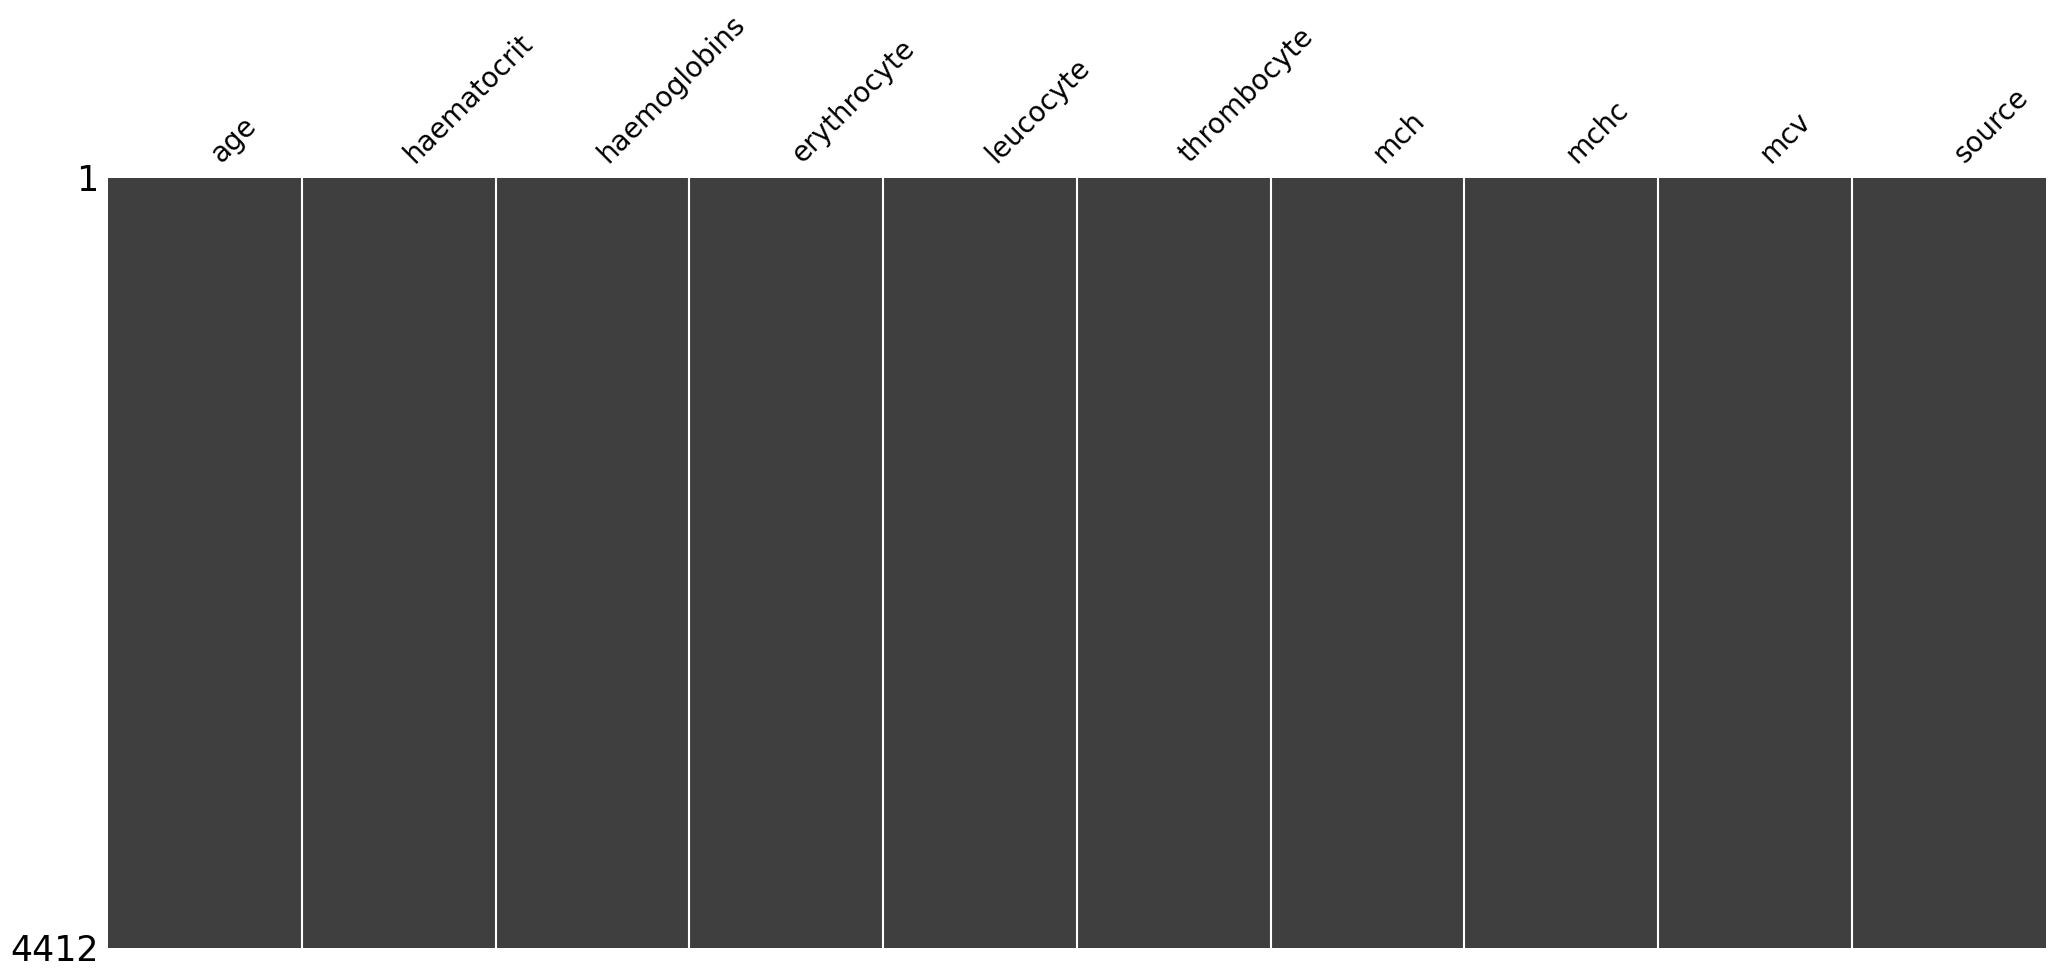

In [499]:
import missingno as msno
msno.matrix(df_ordered, sparkline=False, fontsize=20)
plt.savefig('msno1.png', dpi=300, bbox_inches='tight', format='png')
plt.savefig('msno2.svg', dpi=300, bbox_inches='tight', format='svg')

## Converting Object to Numeric Data Type and Confirming Information Incuding Data Columns, DataTypes Memory, Data Frame Shape

In [500]:
for col in df_ordered.columns[:-1]:
      df_ordered[col] = pd.to_numeric(df_ordered[col], errors='coerce')


In [501]:
df_ordered.info()
df_ordered.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           4412 non-null   int64  
 1   haematocrit   4412 non-null   float64
 2   haemoglobins  4412 non-null   float64
 3   erythrocyte   4412 non-null   float64
 4   leucocyte     4412 non-null   float64
 5   thrombocyte   4412 non-null   int64  
 6   mch           4412 non-null   float64
 7   mchc          4412 non-null   float64
 8   mcv           4412 non-null   float64
 9   source        4412 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 344.8+ KB


(4412, 10)

In [502]:
print(df_ordered)

      age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0      1      35.1          11.8         4.65         6.3         310       
1      1      43.5          14.8         5.39        12.7         334       
2      1      33.5          11.3         4.74        13.2         305       
3      1      39.1          13.7         4.98        10.5         366       
4      1      30.9           9.9         4.23        22.1         333       
...   ...          ...           ...          ...        ...          ...   
4407  92      32.8          10.4         3.49         8.1          72       
4408  92      33.7          10.8         3.67         6.7          70       
4409  93      33.2          11.2         3.47         7.2         235       
4410  98      31.5          10.4         3.15         9.1         187       
4411  99      33.5          10.9         3.44         5.8         275       

       mch  mchc   mcv  source  
0     25.4  33.6   75.5   out   
1     27.

# Correlation Matrices 

## Pearson Triangular Correlations Matrix and Heatmap

In [503]:
correlation_matrix_p=df_ordered.iloc[:, :-1].corr(method='pearson')
correlation_matrix_p
np.triu(np.ones_like(correlation_matrix_p))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

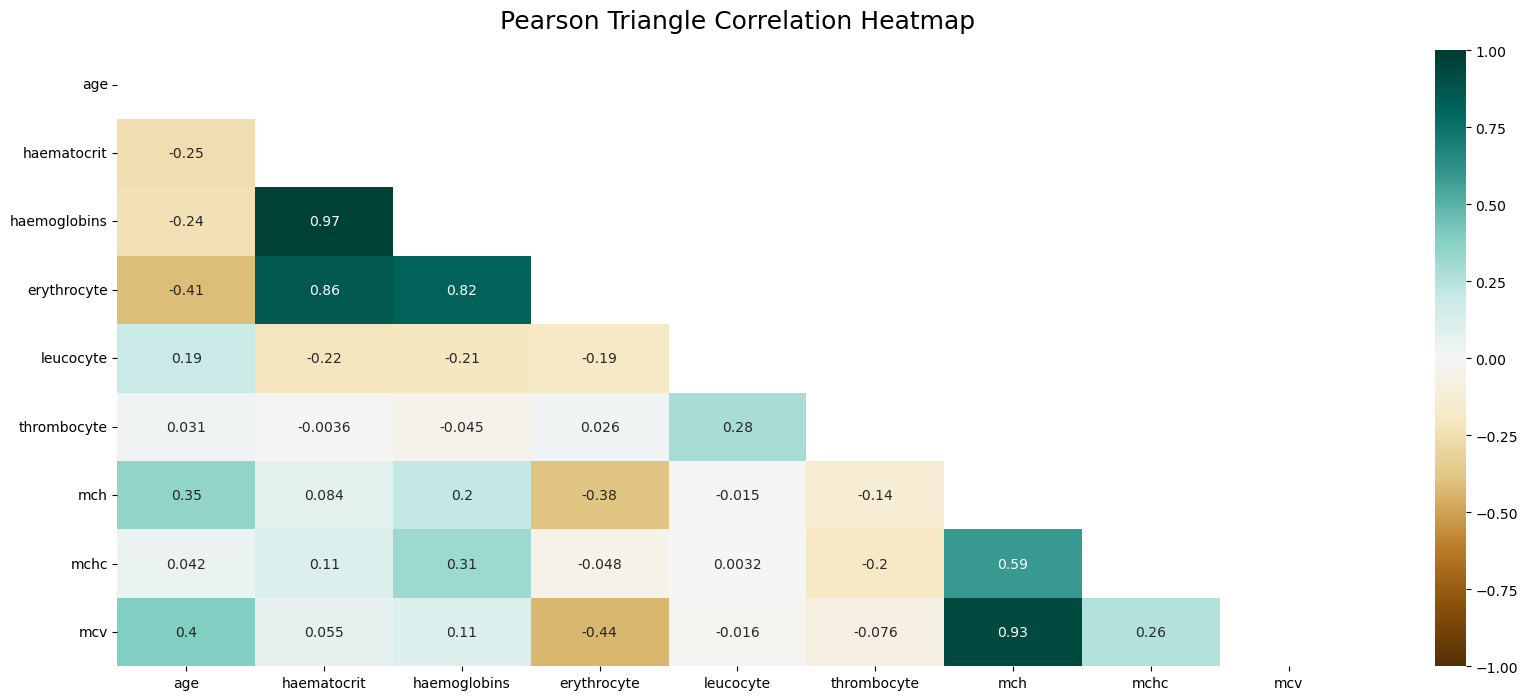

In [504]:
#visualizing correlation matrix for pearson method
plt.figure(figsize=(20,8))
mask=np.triu(np.ones_like(correlation_matrix_p, dtype=bool))
heatmap = sns.heatmap(correlation_matrix_p, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Pearson Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('Pearson Triangle Corr heatmap1.png', dpi=300, bbox_inches='tight', format='png')


## Spearman Correlation Matrix and Heatmap

In [505]:
correlation_matrix_s=df_ordered.iloc[:,:-1].corr(method='spearman')
correlation_matrix_s


age    haematocrit  haemoglobins  erythrocyte  leucocyte  \
age           1.000000  -0.256384     -0.246294    -0.425167    0.218915    
haematocrit  -0.256384   1.000000      0.975507     0.865635   -0.189172    
haemoglobins -0.246294   0.975507      1.000000     0.826160   -0.187054    
erythrocyte  -0.425167   0.865635      0.826160     1.000000   -0.171997    
leucocyte     0.218915  -0.189172     -0.187054    -0.171997    1.000000    
thrombocyte   0.008661  -0.006640     -0.039613     0.040957    0.358341    
mch           0.390483   0.061793      0.155858    -0.341033   -0.002554    
mchc          0.013401   0.114275      0.303282     0.013233   -0.007933    
mcv           0.422861   0.032718      0.054590    -0.403894    0.002358    

              thrombocyte     mch      mchc       mcv    
age            0.008661    0.390483  0.013401  0.422861  
haematocrit   -0.006640    0.061793  0.114275  0.032718  
haemoglobins  -0.039613    0.155858  0.303282  0.054590  
erythrocyte    0.040957   -0.341033  0.013233 -0.403894  
leucocyte      0.358341   -0.002554 -0.007933  0.002358  
thrombocyte    1.000000   -0.134679 -0.175218 -0.072532  
mch           -0.134679    1.000000  0.487823  0.893668  
mchc          -0.175218    0.487823  1.000000  0.115496  
mcv           -0.072532    0.893668  0.115496  1.000000

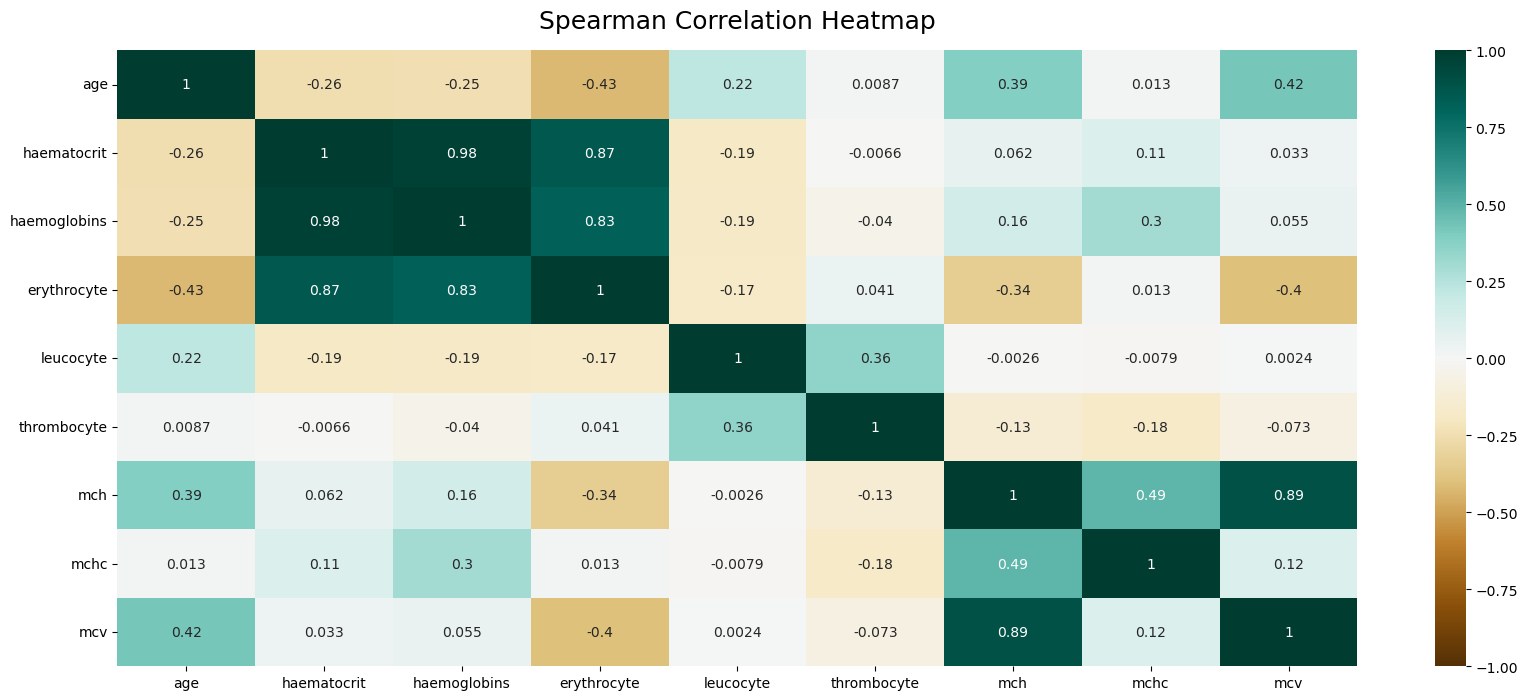

In [506]:
#visualizing correlation matrix for spearman method
plt.figure(figsize=(20,8))
heatmap = sns.heatmap(correlation_matrix_s, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Spearman Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('Spearman Correlation Heatmap1.png', dpi=300, bbox_inches='tight', format='png')

# Determining Uniqueness/Duplication, Gruopby, Pivot Table Analysis

In [507]:
df_ordered.nunique()

age              95
haematocrit     326
haemoglobins    128
erythrocyte     433
leucocyte       276
thrombocyte     554
mch             189
mchc            105
mcv             406
source            2
dtype: int64

In [508]:
df_ordered.index.is_unique

True

In [509]:
df_ordered.duplicated(['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
                       'thrombocyte', 'mch', 'mchc', 'mcv', 'source'], keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
4407    False
4408    False
4409    False
4410    False
4411    False
Length: 4412, dtype: bool

In [510]:
data_gr = df_ordered.groupby(df_ordered.columns.tolist())
size = data_gr.size().reset_index()
duplicates_df_ordered = size[size[0] > 1]  # DataFrame of duplicate rows
duplicates_df_ordered
num_duplicates = len(duplicates_df_ordered)  # Number of duplicates
num_duplicates

0

In [511]:
data_gr1=df_ordered.groupby('source')
data_gr1

In [512]:
data_pivot=pd.pivot_table(df_ordered, columns=['source'], aggfunc="sum", margins=True)
data_pivot

source           in         All        out        All   
age            88335.00   88335.00  117381.00  117381.00
erythrocyte     7707.77    7707.77   12328.27   12328.27
haematocrit    64636.70   64636.70  103891.50  103891.50
haemoglobins   21579.40   21579.40   34637.10   34637.10
leucocyte      17055.50   17055.50   21411.00   21411.00
mch            50293.70   50293.70   74277.80   74277.80
mchc           59531.10   59531.10   87578.40   87578.40
mcv           150615.00  150615.00  222697.30  222697.30
thrombocyte   399413.00  399413.00  736785.00  736785.00

# Numeric Data Frame Making, Calulating Measures of Central Tendecy and Dispersion 

In [513]:
df_num=df_ordered.select_dtypes(include=[np.number])
df_num

age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0      1      35.1          11.8         4.65         6.3         310       
1      1      43.5          14.8         5.39        12.7         334       
2      1      33.5          11.3         4.74        13.2         305       
3      1      39.1          13.7         4.98        10.5         366       
4      1      30.9           9.9         4.23        22.1         333       
...   ...          ...           ...          ...        ...          ...   
4407  92      32.8          10.4         3.49         8.1          72       
4408  92      33.7          10.8         3.67         6.7          70       
4409  93      33.2          11.2         3.47         7.2         235       
4410  98      31.5          10.4         3.15         9.1         187       
4411  99      33.5          10.9         3.44         5.8         275       

       mch  mchc   mcv   
0     25.4  33.6   75.5  
1     27.5  34.0   80.7  
2     23.8  33.7   70.7  
3     27.5  35.0   78.5  
4     23.4  32.0   73.0  
...    ...   ...    ...  
4407  29.8  31.7   94.0  
4408  29.4  32.0   91.8  
4409  32.3  33.7   95.7  
4410  33.0  33.0  100.0  
4411  31.7  32.5   97.4  

[4412 rows x 9 columns]

In [514]:
print(len(df_num.columns))
# Calculate mean,mediam,mode only for numeric columns
mean=df_num.mean()
median=df_num.median()
mode=df_num.mode()
# Calculate standard deviation, skewness,kurtosis only for numeric columns
std = df_num.std()
skewness=df_num.skew()
kurtosis_num=df_num.kurtosis()
display(f" mean: {mean}")
display(f" median: {median}")
display(f" mode: {mode}")
display(f"standard deviation: {std}")
display(f" kurtosis: {kurtosis_num}")
display(f" skewness: {skewness}")

9


' mean: age              46.626473\nhaematocrit      38.197688\nhaemoglobins     12.741727\nerythrocyte       4.541260\nleucocyte         8.718608\nthrombocyte     257.524479\nmch              28.234701\nmchc             33.343042\nmcv              84.612942\ndtype: float64'

' median: age              47.00\nhaematocrit      38.60\nhaemoglobins     12.90\nerythrocyte       4.57\nleucocyte         7.60\nthrombocyte     256.00\nmch              28.70\nmchc             33.40\nmcv              85.40\ndtype: float64'

' mode:    age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte   mch  \\\n0  25      39.0          13.4         4.81         7.1         150      29.3   \n\n   mchc   mcv  \n0  33.3  87.6  '

'standard deviation: age              21.731218\nhaematocrit       5.974784\nhaemoglobins      2.079903\nerythrocyte       0.784091\nleucocyte         5.049041\nthrombocyte     113.972365\nmch               2.672639\nmchc              1.228664\nmcv               6.859101\ndtype: float64'

' kurtosis: age             -0.839430\nhaematocrit      0.129614\nhaemoglobins    -0.063524\nerythrocyte      0.526579\nleucocyte       17.742634\nthrombocyte      3.936091\nmch              2.648859\nmchc             2.562995\nmcv              1.816419\ndtype: float64'

' skewness: age            -0.124524\nhaematocrit    -0.303819\nhaemoglobins   -0.312439\nerythrocyte    -0.007436\nleucocyte       2.792556\nthrombocyte     0.845498\nmch            -1.170640\nmchc           -0.470792\nmcv            -0.803890\ndtype: float64'

In [515]:
print(df_num.dtypes)

age               int64
haematocrit     float64
haemoglobins    float64
erythrocyte     float64
leucocyte       float64
thrombocyte       int64
mch             float64
mchc            float64
mcv             float64
dtype: object


# Grhaphically Displying Kurtosis for Numeric Data Frame

<function matplotlib.pyplot.show(close=None, block=None)>

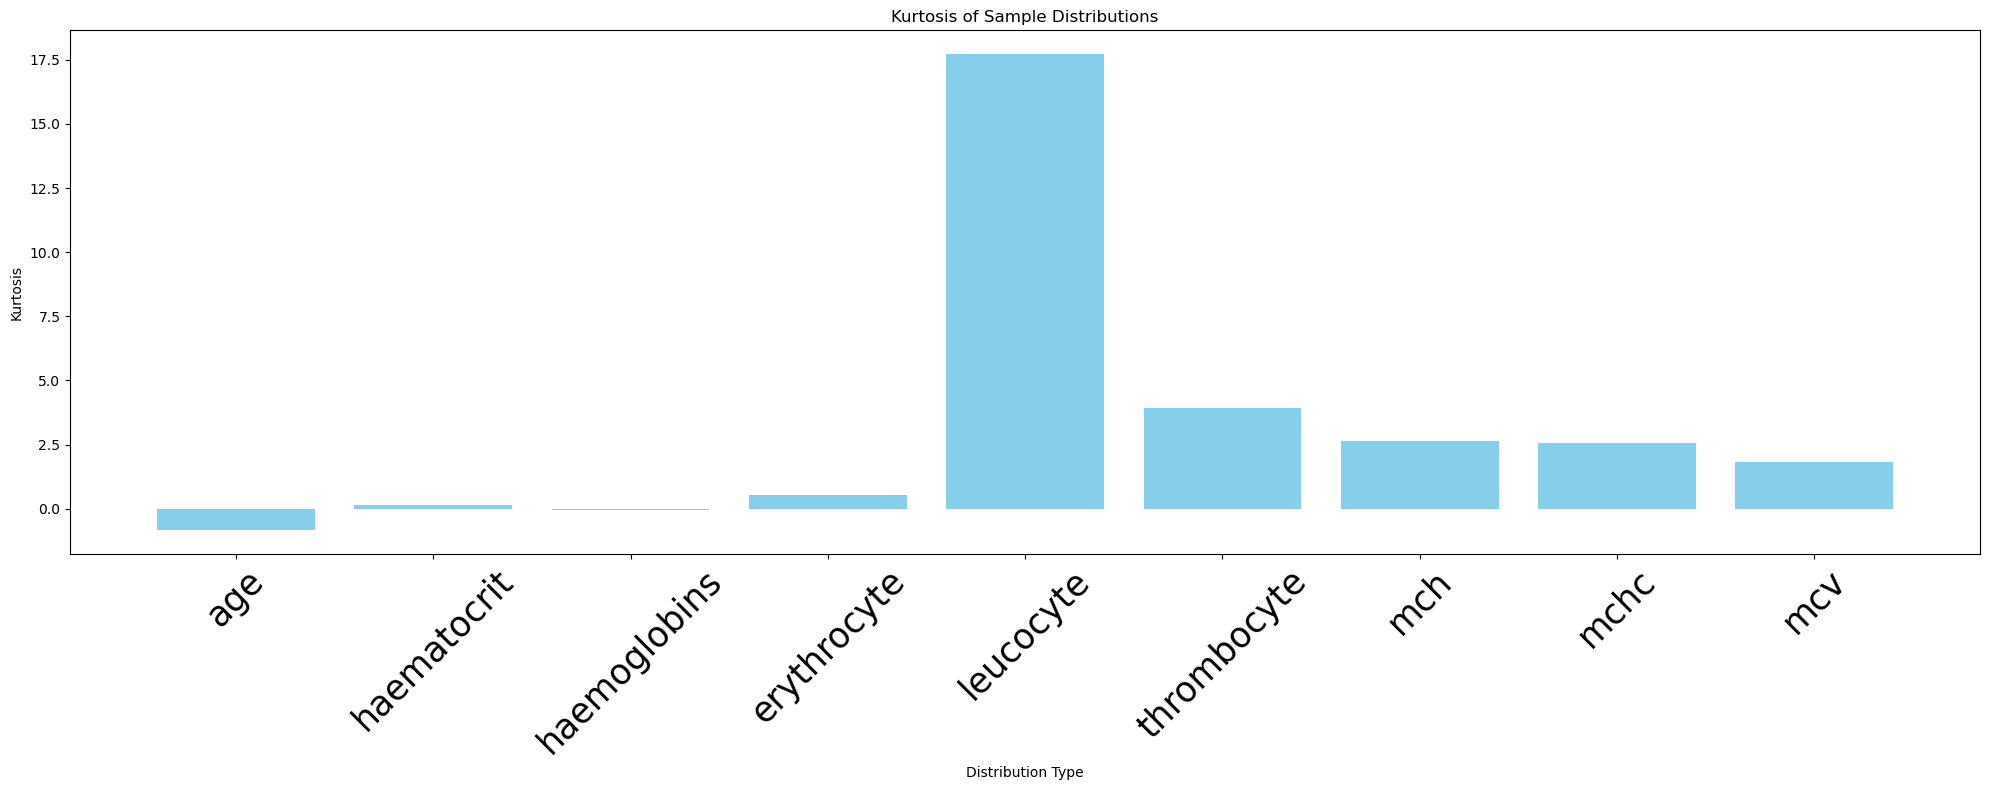

In [516]:
from scipy import stats  # Import stats module from SciPy for kurtosis calculation


def calculate_kurtosis(df_num):
  # Calculates the unbiased kurtosis of a data set
  return stats.kurtosis(df_num)  # Use scipy.stats.kurtosis for unbiased kurtosis


# Calculate kurtosis for each distribution
kurtosis_values = {name: calculate_kurtosis(dist_df_num) for name, dist_df_num in df_num.items()}

# Create the plot
plt.figure(figsize=(20, 8))
plt.bar(df_num.keys(), kurtosis_values.values(), color='skyblue')
plt.xlabel("Distribution Type")
plt.ylabel("Kurtosis")
plt.title("Kurtosis of Sample Distributions")
plt.xticks(rotation=45, fontsize=25)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show

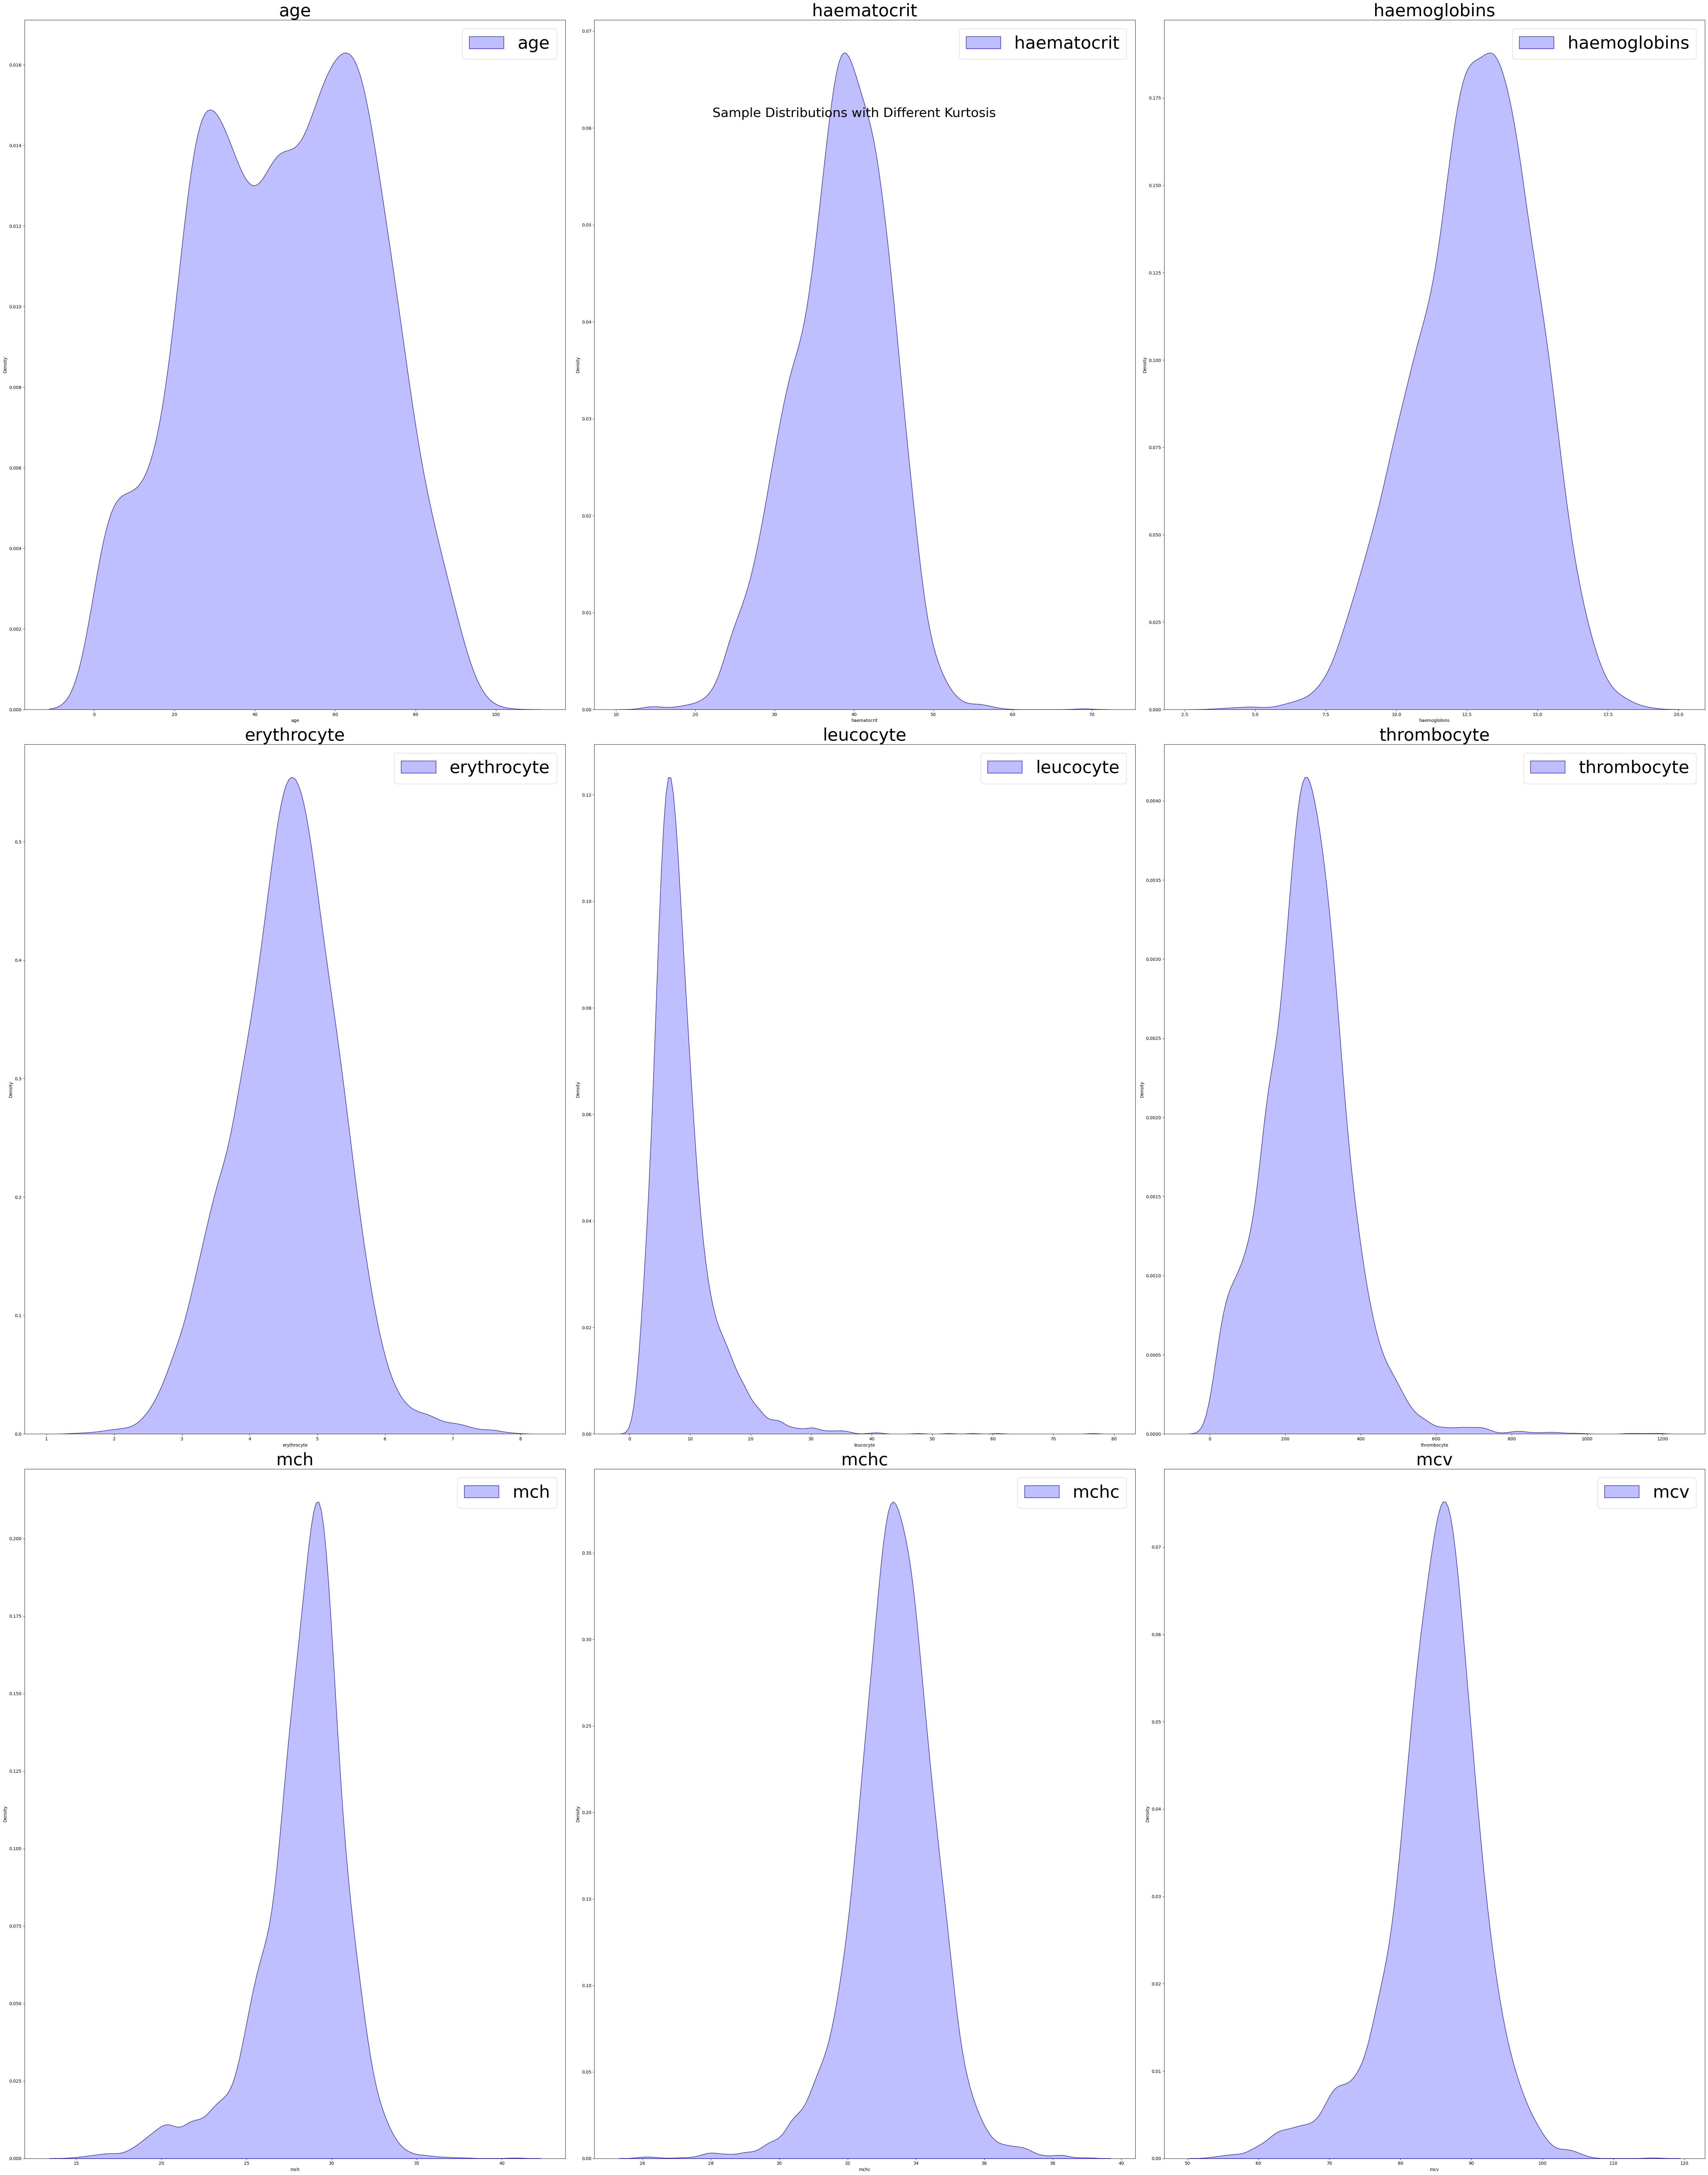

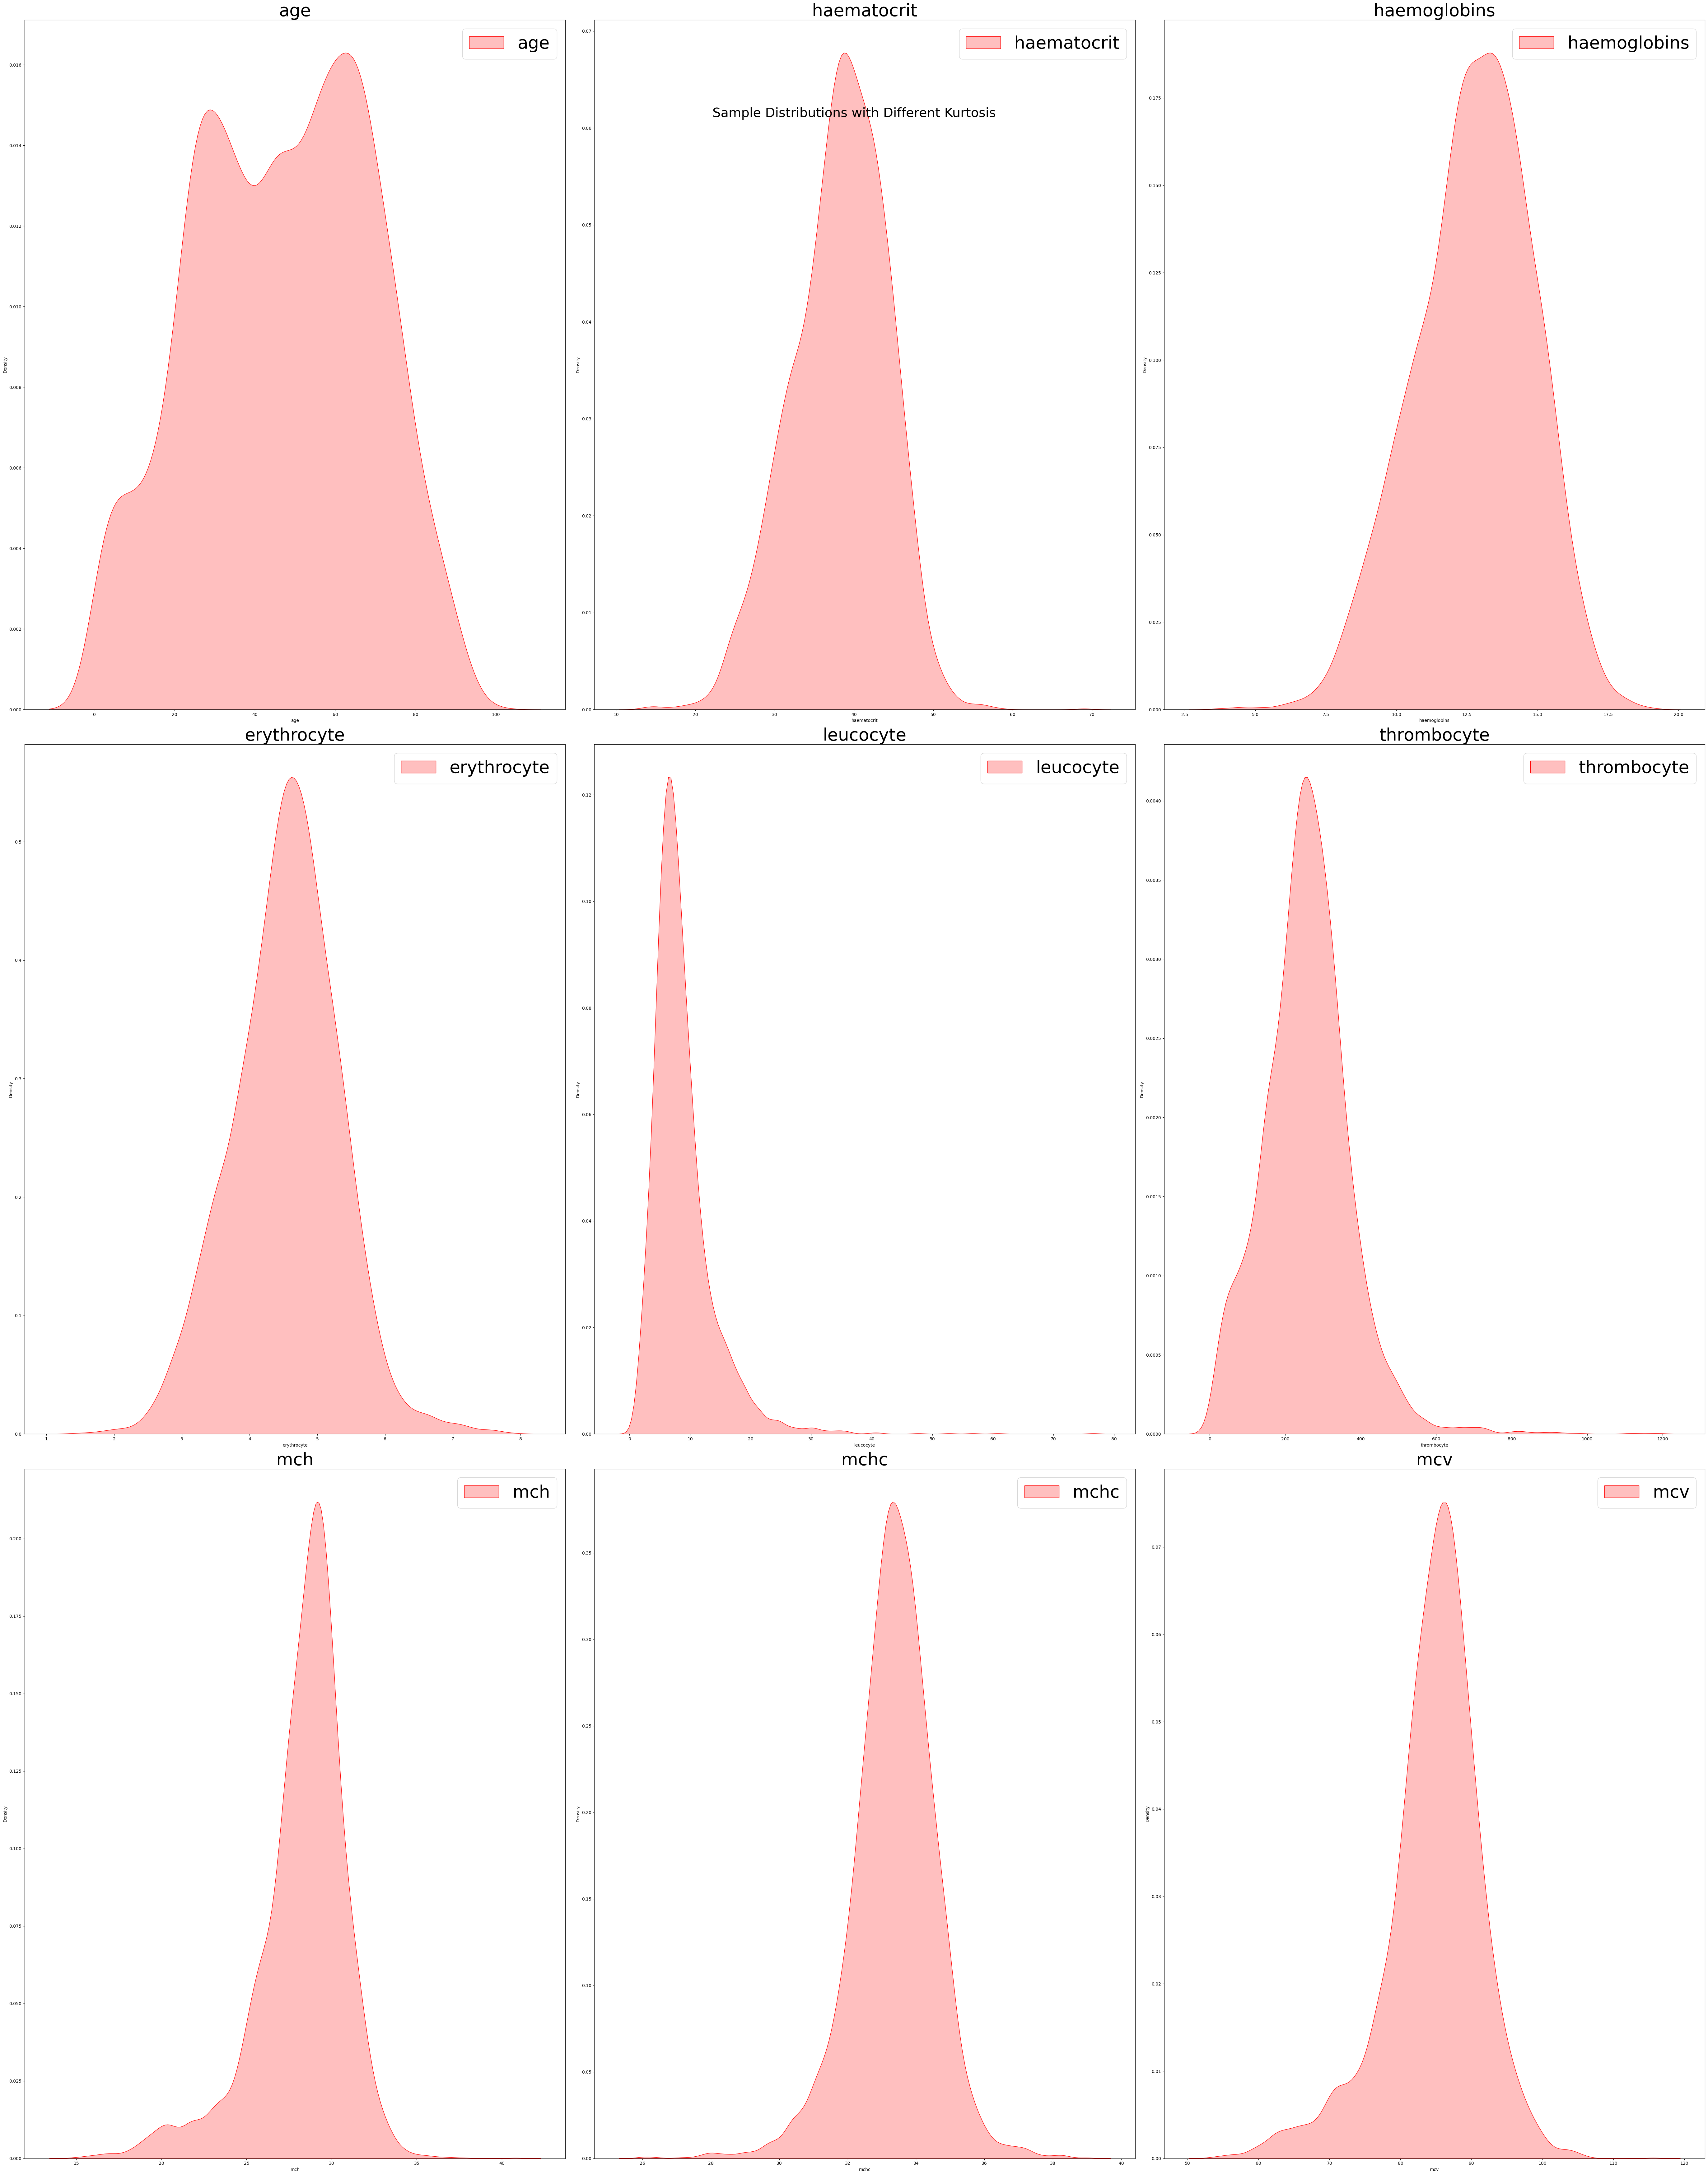

In [517]:
# Create subplots for Matplotlib
fig, axes = plt.subplots(3, 3, figsize=(55, 70))


# Plot distributions using Matplotlib
for i, (name, dist_df_num) in enumerate(df_num.items()):
    ax = axes.flat[i]
    sns.kdeplot(dist_df_num, ax=ax,fill=True, color='blue', label=name)
    ax.set_title(name, fontsize=40)  # Adjust title font size
    ax.legend(fontsize=40)  # Adjust legend font size

# Adjust layout for Matplotlib
plt.figtext(0.5, 0.95, "Sample Distributions with Different Kurtosis",
            ha='center', va='top', fontsize=30)
plt.tight_layout()
plt.show()

# Create subplots for Seaborn
fig, axes = plt.subplots(3, 3, figsize=(55, 70))

# Plot distributions using Seaborn
for i, (name, dist_df_num) in enumerate(df_num.items()):
    ax = axes.flat[i]
    sns.kdeplot(dist_df_num, fill=True, ax=ax, color='red', label=name)

    ax.set_title(name, fontsize=40)  # Adjust title font size
    ax.legend(fontsize=40)  # Adjust legend font size

# Adjust layout for Seaborn
plt.figtext(0.5, 0.95, "Sample Distributions with Different Kurtosis",
            ha='center', va='top', fontsize=30)
# Set larger font sizes

plt.tight_layout()
plt.savefig("Sample Distribution with Different Kurtosis.png", dpi=300, bbox_inches='tight', format='png')

In [518]:
print(len(axes.flat))

9


# Outliers Calculation and Grhaphical Presentation

## Numerical Data Z Scores and Outliers Detection 

In [519]:
# Calculate z-scores
z_scores = ((df_num - mean) / std)
# Print the z-scores with better formatting
#print(z_scores.to_string())  # Or use other formatting methods like .head() or .tail()
display(z_scores.tail(5))

age    haematocrit  haemoglobins  erythrocyte  leucocyte  \
4407  2.087942  -0.903411     -1.125883    -1.340737   -0.122520    
4408  2.087942  -0.752778     -0.933566    -1.111172   -0.399800    
4409  2.133959  -0.836463     -0.741250    -1.366244   -0.300772    
4410  2.364043  -1.120992     -1.125883    -1.774360    0.075537    
4411  2.410059  -0.786252     -0.885487    -1.404505   -0.578052    

      thrombocyte     mch      mchc       mcv    
4407  -1.627802    0.585675 -1.337258  1.368555  
4408  -1.645350    0.436011 -1.093091  1.047813  
4409  -0.197631    1.521080  0.290525  1.616401  
4410  -0.618786    1.782994 -0.279199  2.243305  
4411   0.153331    1.296583 -0.686145  1.864247

In [520]:
# Identify outliers (absolute z-score > 3)
outlier_rows = z_scores[np.abs(z_scores) > 3].index  # Get rows with outlier z-scores

# Access the actual outlier data points using the outlier rows
outliers = df_num.loc[outlier_rows]

print("Outliers with (Z-Score)>3:")
display("1st ten records:", outliers.head(10))
display("last ten records", outliers.tail(10))
display(outliers.shape)

Outliers with (Z-Score)>3:


'1st ten records:'

age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte   mch  \
0   1      35.1          11.8         4.65         6.3         310      25.4   
1   1      43.5          14.8         5.39        12.7         334      27.5   
2   1      33.5          11.3         4.74        13.2         305      23.8   
3   1      39.1          13.7         4.98        10.5         366      27.5   
4   1      30.9           9.9         4.23        22.1         333      23.4   
5   1      34.3          11.6         4.53         6.6         185      25.6   
6   1      31.1           8.7         5.06        11.1         416      17.2   
7   1      40.3          13.3         4.73         8.1         257      28.1   
8   1      33.6          11.5         4.54        11.4         262      25.3   
9   1      35.4          11.4         4.80         2.6         183      23.8   

   mchc   mcv  
0  33.6  75.5  
1  34.0  80.7  
2  33.7  70.7  
3  35.0  78.5  
4  32.0  73.0  
5  33.8  75.7  
6  28.0  61.5  
7  33.0  85.2  
8  34.2  74.0  
9  32.2  73.8

'last ten records'

age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
4402  92      29.1           9.5         3.24         8.9         116       
4403  92      28.3           9.4         3.08         7.5         105       
4404  92      31.9          10.3         3.42         8.7         110       
4405  92      28.3           9.2         3.03         8.4         100       
4406  92      33.7          10.4         3.48        11.4         112       
4407  92      32.8          10.4         3.49         8.1          72       
4408  92      33.7          10.8         3.67         6.7          70       
4409  93      33.2          11.2         3.47         7.2         235       
4410  98      31.5          10.4         3.15         9.1         187       
4411  99      33.5          10.9         3.44         5.8         275       

       mch  mchc   mcv   
4402  29.3  32.6   89.8  
4403  30.5  33.2   91.9  
4404  30.1  32.3   93.3  
4405  30.4  32.5   93.4  
4406  29.9  30.9   96.8  
4407  29.8  31.7   94.0  
4408  29.4  32.0   91.8  
4409  32.3  33.7   95.7  
4410  33.0  33.0  100.0  
4411  31.7  32.5   97.4

(4412, 9)

In [521]:
## Numerical Outliers Detection through Interqurartile Range Algorithm

In [522]:
def detect_outliers(df_num, column):
  Q1 = df_num[column].quantile(0.25)
  Q3 = df_num[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df_num[(df_num[column] < lower_bound) | (df_num[column] > upper_bound)]

# Columns to check for outliers
numerical_columns = ['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte','thrombocyte', 'mch', 'mchc', 'mcv']

# Detect outliers
outliers = {col: detect_outliers(df_num, col) for col in numerical_columns}

# Display the number of outliers detected in each column
{col: len(outliers_df_num) for col, outliers_df_num in outliers.items()}

{'age': 0,
 'haematocrit': 30,
 'haemoglobins': 22,
 'erythrocyte': 65,
 'leucocyte': 257,
 'thrombocyte': 75,
 'mch': 270,
 'mchc': 160,
 'mcv': 238}

In [523]:
print (list(enumerate(numerical_columns)))

[(0, 'age'), (1, 'haematocrit'), (2, 'haemoglobins'), (3, 'erythrocyte'), (4, 'leucocyte'), (5, 'thrombocyte'), (6, 'mch'), (7, 'mchc'), (8, 'mcv')]


## Pictorial View of Outliers 

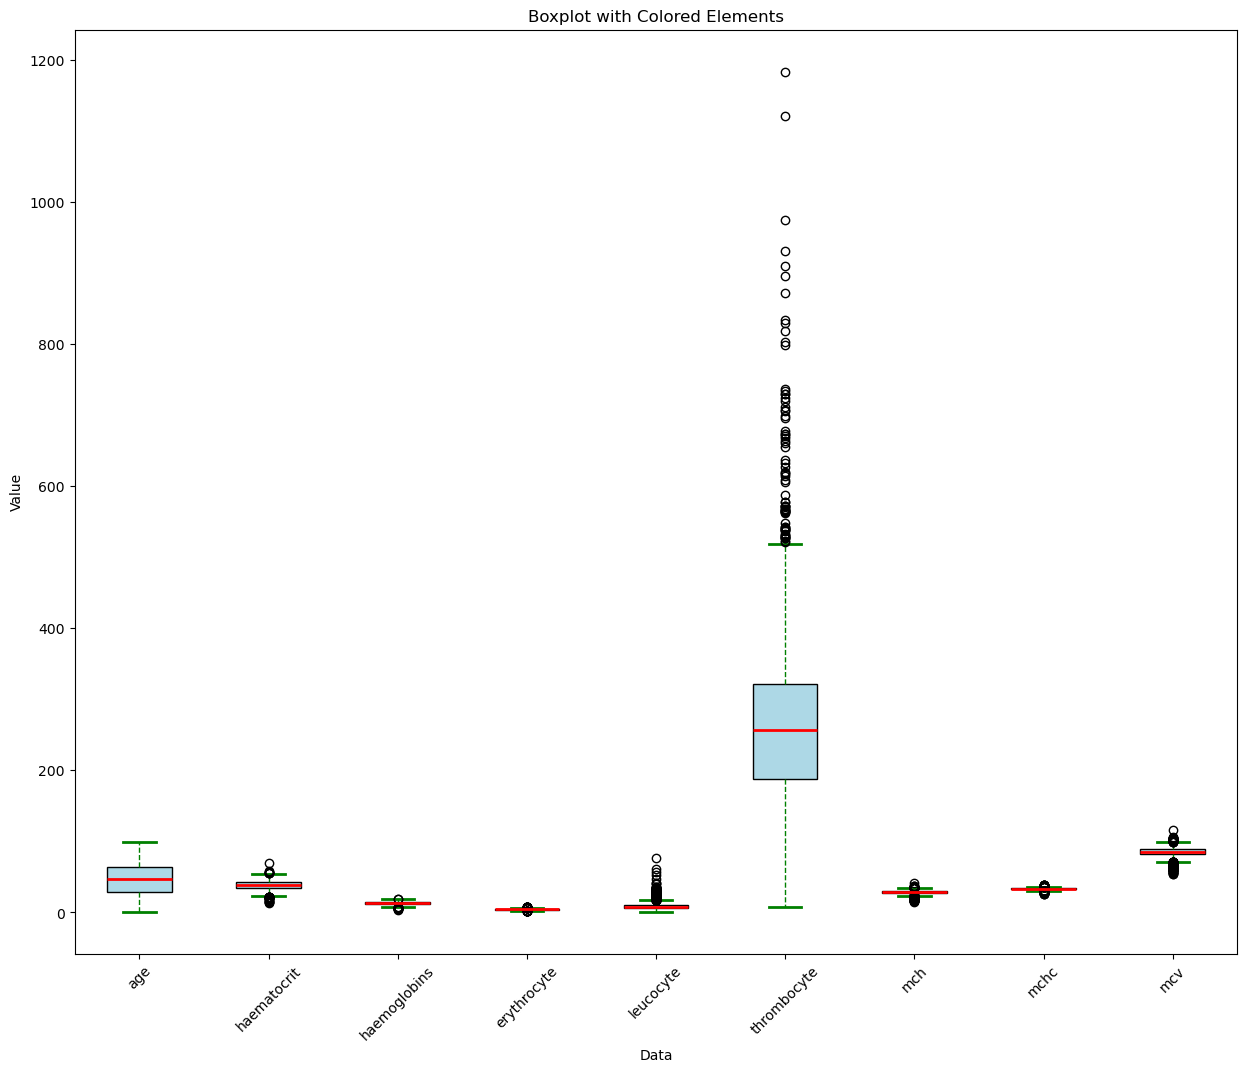

In [524]:
numerical_columns = df_num[['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
                            'thrombocyte', 'mch', 'mchc', 'mcv']].fillna(value=0)
index_values=[1,2,3,4,5,6,7,8,9]

# Define colors for each element
boxprops = {"facecolor": "lightblue", "edgecolor": "black"}
medianprops = {"linewidth": 2, "color": "red"}
whiskerprops = {"linestyle": "--", "color": "green"}
capprops = {"linewidth": 2, "color": "green"}

# Create box plot
plt.figure(figsize=(15, 12))  # Increase figure size (width, height)
plt.boxplot(numerical_columns, patch_artist=True, boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops,  capprops=capprops)

plt.xlabel("Data")
plt.ylabel("Value")
plt.title("Boxplot with Colored Elements")
plt.xticks(index_values,numerical_columns,rotation=45)
plt.show()

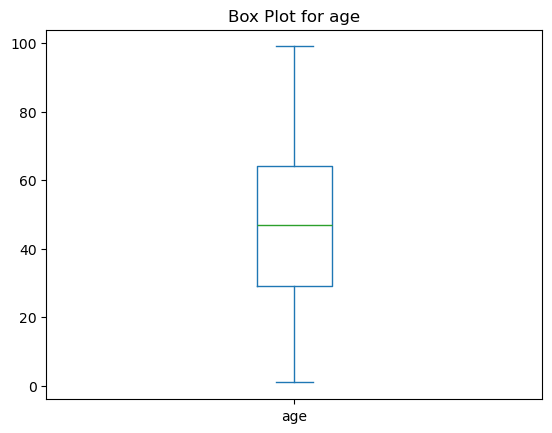

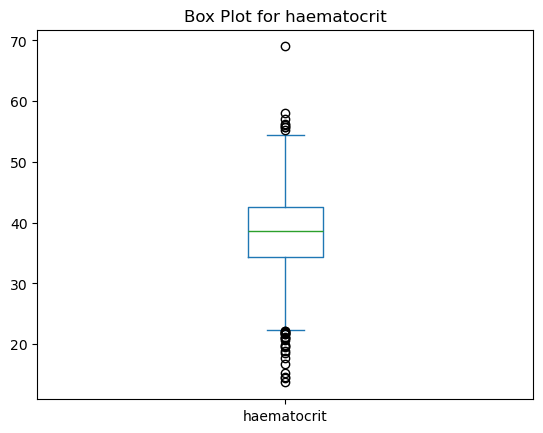

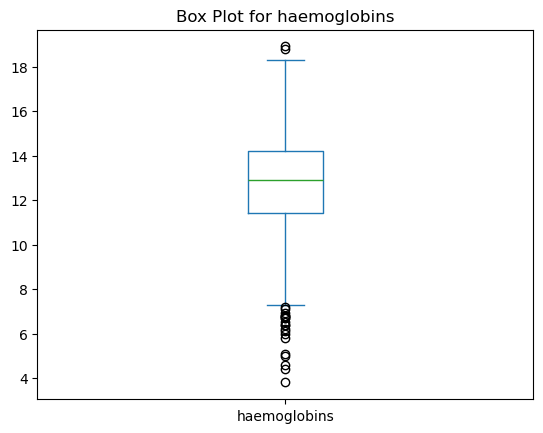

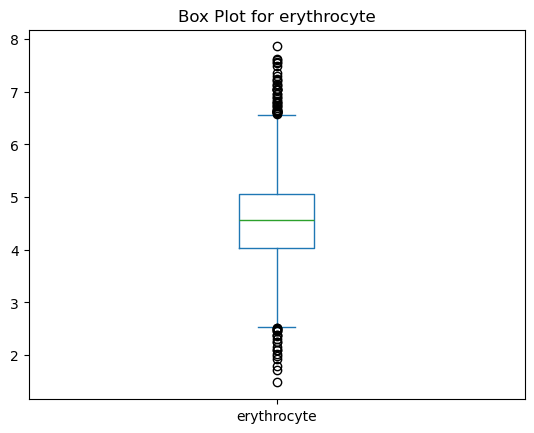

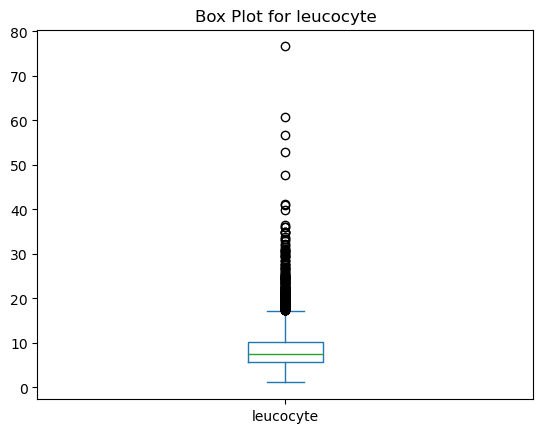

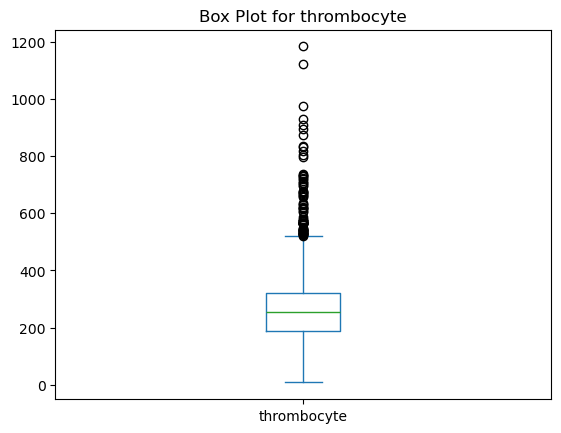

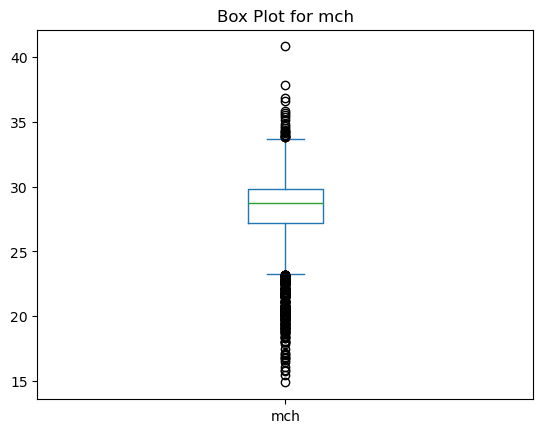

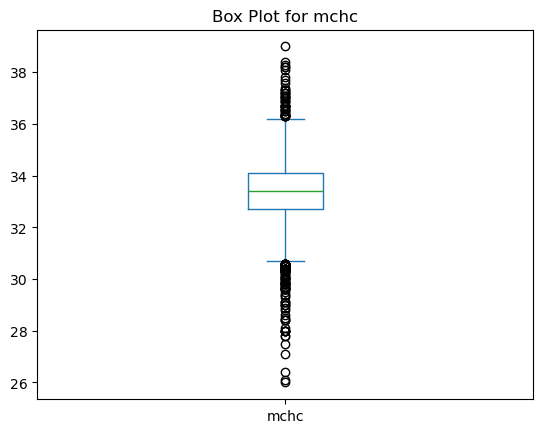

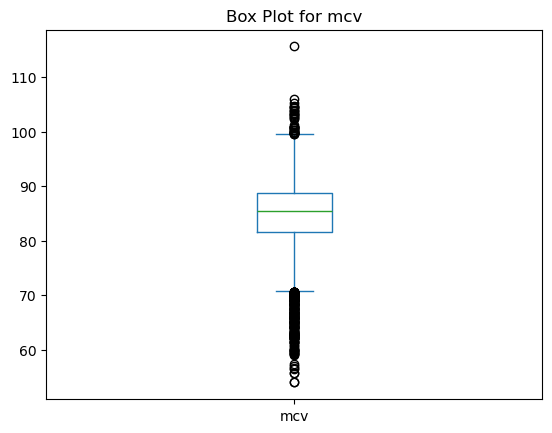

In [525]:
for col in numerical_columns:
    df_num[col].plot(kind='box')
    plt.title(f"Box Plot for {col}")
    plt.show()

## Filtering the Categorical and Numerical Outliers after Detection 

In [526]:
numerical_columns.columns

Index(['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
       'thrombocyte', 'mch', 'mchc', 'mcv'],
      dtype='object')

In [527]:


df_ordered=df_ordered[['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
               'thrombocyte', 'mch', 'mchc', 'mcv', 'source']]


# Assuming columns_numeric contains numeric columns
numerical_columns = ['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
                     'thrombocyte', 'mch', 'mchc', 'mcv']

# Identify potential categorical columns (replace with your logic if necessary)
categorical_columns = [col for col in df_ordered.columns if df_ordered[col].dtype == 'object']


def detect_and_remove_outliers_iqr(df_ordered, columns_to_check, iqr_multiplier=1.5):
   

    df_ordered_filtered = df_ordered.copy()  # Avoid modifying the original DataFrame
    for col in columns_to_check:
        try:
            Q1 = df_ordered_filtered[col].quantile(0.25)
            Q3 = df_ordered_filtered[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR

            # Filter out outliers using boolean indexing
            df_ordered_filtered = df_ordered_filtered[df_ordered[col].between(lower_bound, upper_bound)]
        except KeyError:
            print(f"Column '{col}' not found in DataFrame.")

    return df_ordered_filtered

# Example usage
df_ordered_without_outliers_iqr = detect_and_remove_outliers_iqr(df_ordered.copy(), numerical_columns)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8732\3943108186.py:26: UserWarning:

Boolean Series key will be reindexed to ma

## Fining the NaN Values and Non-Numeric 

In [528]:
df_ordered_without_outliers_iqr.isna()

age   haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0     False     False         False        False       False       False      
1     False     False         False        False       False       False      
3     False     False         False        False       False       False      
5     False     False         False        False       False       False      
7     False     False         False        False       False       False      
...     ...          ...           ...          ...        ...          ...   
4406  False     False         False        False       False       False      
4407  False     False         False        False       False       False      
4408  False     False         False        False       False       False      
4409  False     False         False        False       False       False      
4411  False     False         False        False       False       False      

       mch   mchc    mcv   source  
0     False  False  False   False  
1     False  False  False   False  
3     False  False  False   False  
5     False  False  False   False  
7     False  False  False   False  
...     ...    ...    ...     ...  
4406  False  False  False   False  
4407  False  False  False   False  
4408  False  False  False   False  
4409  False  False  False   False  
4411  False  False  False   False  

[3693 rows x 10 columns]

In [529]:
df_ordered_without_outliers_iqr.isna().sum()

age             0
haematocrit     0
haemoglobins    0
erythrocyte     0
leucocyte       0
thrombocyte     0
mch             0
mchc            0
mcv             0
source          0
dtype: int64

In [530]:

cat_num_cols = ['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
                'thrombocyte', 'mch', 'mchc', 'mcv', 'source']

# Identify non-numeric values in each column
for col in cat_num_cols:
    non_numeric = df_ordered_without_outliers_iqr[col].apply(pd.to_numeric, errors='coerce').isna()
    if non_numeric.any():
        print(f"Non-numeric values in {col}:")
        print(df_ordered_without_outliers_iqr.loc[non_numeric, col].unique())


Non-numeric values in source:
['out' 'in']


## Box Plot Comparison for Original and Cleaned Data

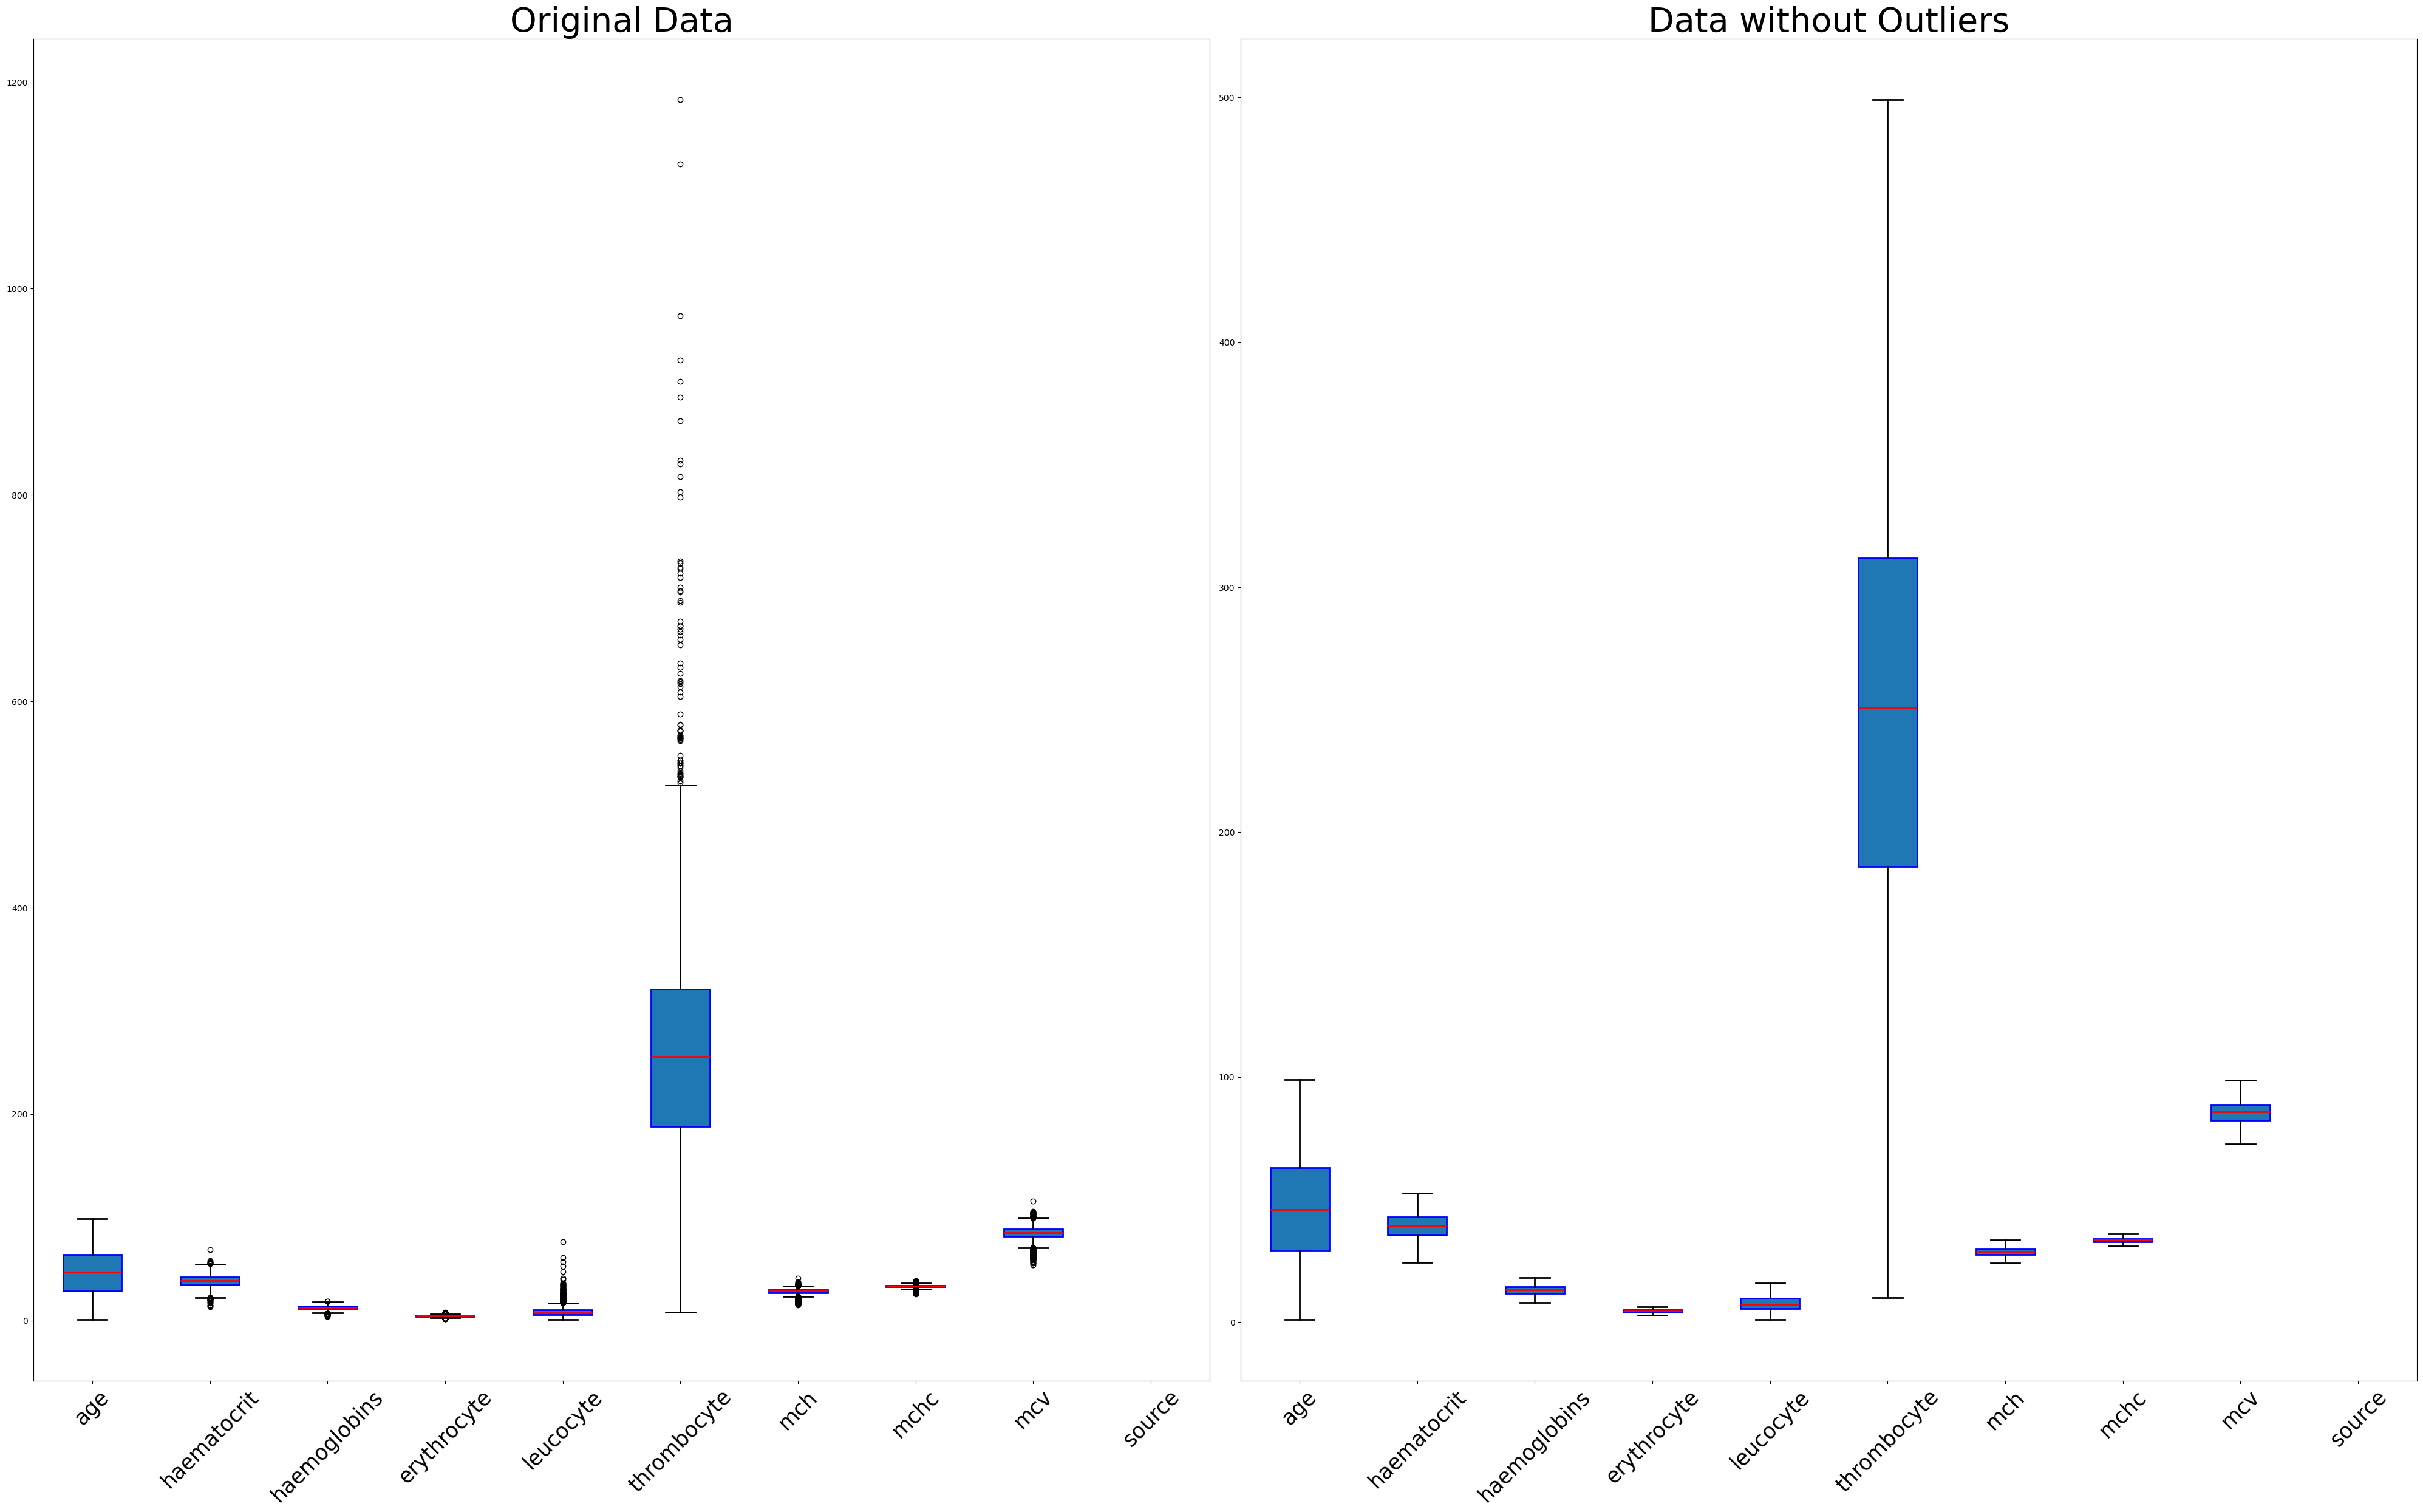

In [531]:
# Customizing boxplot properties
boxprops = dict(linestyle='-', linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
whiskerprops = dict(linestyle='-', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='black')

# Assuming df_original and df_cleaned 
cat_num_cols = ['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
                'thrombocyte', 'mch', 'mchc', 'mcv', 'source']

# Convert all columns to numeric, coercing errors
df_orginal=df_ordered[cat_num_cols].apply(pd.to_numeric, errors='coerce')
df_cleaned = df_ordered_without_outliers_iqr[cat_num_cols].apply(pd.to_numeric, errors='coerce')

# Fill NaNs created by coercing with a placeholder value (e.g., median of the column)
for col in cat_num_cols:
    median_value = df_cleaned[col].median()
    df_cleaned[col]=df_cleaned[col].fillna(median_value)

fig, axs = plt.subplots(1, 2, figsize=(40, 25))  # Create a figure with two subplots

# Boxplot for original data
axs[0].boxplot([df_orginal[col] for col in cat_num_cols], showfliers=True, vert=True,
               patch_artist=True, boxprops=boxprops, medianprops=medianprops,
               whiskerprops=whiskerprops, capprops=capprops)
axs[0].set_title('Original Data', fontsize=40)
axs[0].set_xticklabels(cat_num_cols, rotation=45, fontsize=25)

# Boxplot for data without outliers
axs[1].boxplot([df_cleaned[col] for col in cat_num_cols], showfliers=False, vert=True,
               patch_artist=True, boxprops=boxprops, medianprops=medianprops,
               whiskerprops=whiskerprops, capprops=capprops)
axs[1].set_title('Data without Outliers', fontsize=40)
axs[1].set_xticklabels(cat_num_cols, rotation=45, fontsize=25)

plt.tight_layout()
plt.savefig('boxplotcomparison1.png', dpi=300, bbox_inches='tight', format='png')

# Data Frame without Outliers

In [532]:
print(df_ordered_without_outliers_iqr)
print (list(enumerate(df_ordered_without_outliers_iqr)))

      age  haematocrit  haemoglobins  erythrocyte  leucocyte  thrombocyte  \
0      1      35.1          11.8         4.65         6.3         310       
1      1      43.5          14.8         5.39        12.7         334       
3      1      39.1          13.7         4.98        10.5         366       
5      1      34.3          11.6         4.53         6.6         185       
7      1      40.3          13.3         4.73         8.1         257       
...   ...          ...           ...          ...        ...          ...   
4406  92      33.7          10.4         3.48        11.4         112       
4407  92      32.8          10.4         3.49         8.1          72       
4408  92      33.7          10.8         3.67         6.7          70       
4409  93      33.2          11.2         3.47         7.2         235       
4411  99      33.5          10.9         3.44         5.8         275       

       mch  mchc   mcv source  
0     25.4  33.6  75.5   out   
1     27.5 

## Components of Data Frame after Outliers as X, y

In [533]:
df_fa=df_ordered_without_outliers_iqr.iloc[:,:-1].values
print(df_fa)
print(df_fa.shape)

[[ 1.  35.1 11.8 ... 25.4 33.6 75.5]
 [ 1.  43.5 14.8 ... 27.5 34.  80.7]
 [ 1.  39.1 13.7 ... 27.5 35.  78.5]
 ...
 [92.  33.7 10.8 ... 29.4 32.  91.8]
 [93.  33.2 11.2 ... 32.3 33.7 95.7]
 [99.  33.5 10.9 ... 31.7 32.5 97.4]]
(3693, 9)


In [534]:
X=df_fa
X
X.shape

(3693, 9)

In [535]:
#counting specific constants in the datset df_sf
count_specific_value = (df_fa == np.nan)
print(count_specific_value)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [536]:
y=df_ordered_without_outliers_iqr.iloc[:,-1:].values
print(y)
y.shape


[['out']
 ['out']
 ['out']
 ...
 ['in']
 ['out']
 ['out']]


(3693, 1)

In [537]:
y=y.ravel()
y
y.shape

(3693,)

# Model Development


The classification model will be developed as the Target Variable consists of two categorical binary records for in-patient or outpatient treatement which Diagnose the Disease, Identify Risk Level of the Patient and Recommend Patient Treatment option for Admission to Hosipital or not. In the model, all the Classification Alogorithms have been applied; Confusion Matrices and Cross Validation Scores have been plotted to evaluate significance of Classifiers. evaluation has been carried with two most significant models and one least significant model. Further, Random Forest and Decision Trees Algorithm have been plotted as most significant and least significant. In addition we have also used Principal Component Analysis (PCA) to reducce the feature variables to its two PCAs for Visualizing the Training Sets and Test Sets in case of Random Forest, XG Boost and Decision Tree for the Analysis. As Cross Validation Scores 

The Mean Cross Validation Score provide us threshold for the average performance of your machine learning model across multiple folds in a cross-validation process. It is a robust estimate for model generalizibility. A high mean sore may suggest overfitting; howeveer for comparing different classifiers, the model with highest score is the best, which is in this case is Random Forest. 

In case of Confusion Matrices, the Top Left Corner Diagonal Cell represent True Positive, the Bottom Right Corner Diagonal Cell represent True Negative, Number in the Top Row in the Top Right Corner Cell represnt False Positive(Type 1 Error,predicted value is positive, but actually it is negative) and Number in the Bottom Row in the Bottom Right Cell represent False Negative (Type 2 Error, predicted value is negative but actually it is positive). 



# Preprocessing the DataFrame 

## LabelEncoder() and StandsardScalaer()

In [538]:
le = LabelEncoder()
y = le.fit_transform(y)
y
y.shape

(3693,)

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [540]:
sc = StandardScaler()
X_train[:,-1:] = sc.fit_transform(X_train[:,-1:])
X_test[:,-1:] = sc.transform(X_test[:,-1:])

# Implementing Principal Component Analysis

PCA IS AN UNSUPERVISED DIMENSIONALITY REDUCTION TECHNIEQUE 

## 1) Indirect Method to PCA

### Covariance Matrix

In [541]:
covar_matrix=np.cov(X_train, rowvar=False)
print("Covariance Matrix:\n", covar_matrix)

Covariance Matrix:
 [[ 4.59036714e+02 -3.02554049e+01 -1.01556161e+01 -6.15568497e+00
   1.34627277e+01  5.43085704e+01  1.68532037e+01 -4.13419583e-02
   1.01584580e+01]
 [-3.02554049e+01  3.00304508e+01  1.02795908e+01  3.51612798e+00
  -3.19113425e+00  1.40342423e+01  3.35013560e-01  6.00817554e-01
  -1.02504701e-01]
 [-1.01556161e+01  1.02795908e+01  3.65195892e+00  1.20144402e+00
  -1.04685029e+00 -5.72487614e-01  4.13468240e-01  5.46506150e-01
  -2.96329292e-02]
 [-6.15568497e+00  3.51612798e+00  1.20144402e+00  4.80031617e-01
  -3.88445428e-01  2.06175631e+00 -3.93837988e-01  6.42363352e-02
  -2.70089919e-01]
 [ 1.34627277e+01 -3.19113425e+00 -1.04685029e+00 -3.88445428e-01
   1.08257620e+01  1.10352735e+02  1.18892497e-01  5.53079743e-02
   4.47469288e-02]
 [ 5.43085704e+01  1.40342423e+01 -5.72487614e-01  2.06175631e+00
   1.10352735e+02  9.56948481e+03 -1.63237546e+01 -1.37453681e+01
  -2.77593059e+00]
 [ 1.68532037e+01  3.35013560e-01  4.13468240e-01 -3.93837988e-01
   1.188

### Covariance Heatmap

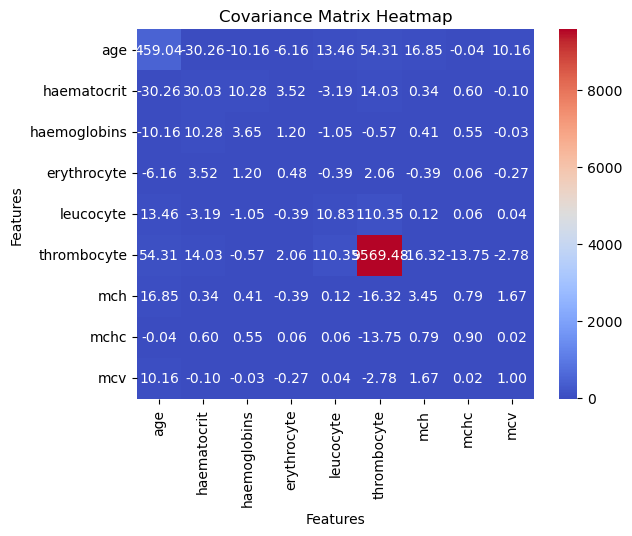

In [542]:
# Create a heatmap
sns.heatmap(covar_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte',
                'thrombocyte', 'mch', 'mchc', 'mcv'],
            yticklabels=['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 'leucocyte', 
                         'thrombocyte', 'mch', 'mchc', 'mcv'])

# Add title and labels
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('Covariance Matrix Heatmap.png', dpi=300, bbox_inches='tight', format='png')
# Show the plot
plt.show()

### Eigen Valuues and Eigen Vectors

In [543]:
# Step 3: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covar_matrix)

# Display the results
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Eigenvalues:
 [9.57115262e+03 4.62418818e+02 3.19173058e+01 8.90208563e+00
 3.53859237e+00 9.26963785e-01 8.60522710e-04 1.63045258e-03
 2.54423005e-03]

Eigenvectors:
 [[-5.96825578e-03  9.95756194e-01  7.55324682e-02 -1.99005657e-02
  -4.66925525e-02 -1.23530765e-02  5.66557750e-05  1.38935678e-05
  -4.42518857e-06]
 [-1.44786340e-03 -7.07397032e-02  9.29372653e-01  1.01489238e-01
  -8.03631098e-02  1.21015760e-01 -2.03755394e-02 -1.70986009e-01
   2.64963740e-01]
 [ 6.60024975e-05 -2.36907116e-02  3.20680977e-01  4.85494530e-02
   6.64569323e-02 -2.77691426e-01  2.00801878e-02  1.84352497e-01
  -8.82228598e-01]
 [-2.11689754e-04 -1.39650161e-02  1.01854832e-01  1.59547896e-02
  -1.12713103e-01 -1.00966229e-01  1.17040660e-01  9.40521904e-01
   2.60763457e-01]
 [-1.15496506e-02  2.87724102e-02 -1.11626197e-01  9.92376207e-01
   4.20423901e-04  4.20421729e-02 -1.55256064e-04  2.32479645e-04
   1.05928053e-04]
 [-9.99911907e-01 -6.10322083e-03 -3.61560650e-04 -1.14355274e-02
   2.3575

In [544]:
# Step 4: Project the Data
# Sort eigenvalues and eigenvectors in descending order. 
# The eigenvectors corresponding to the largest eigenvalues capture the most variance.
eigenvalues_sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalues_sorted_indices ]
eigenvectors_sorted = eigenvectors[:, eigenvalues_sorted_indices ]

print(eigenvalues_sorted)
print("-------------------------------------------------------")
print(eigenvectors_sorted)

[9.57115262e+03 4.62418818e+02 3.19173058e+01 8.90208563e+00
 3.53859237e+00 9.26963785e-01 2.54423005e-03 1.63045258e-03
 8.60522710e-04]
-------------------------------------------------------
[[-5.96825578e-03  9.95756194e-01  7.55324682e-02 -1.99005657e-02
  -4.66925525e-02 -1.23530765e-02 -4.42518857e-06  1.38935678e-05
   5.66557750e-05]
 [-1.44786340e-03 -7.07397032e-02  9.29372653e-01  1.01489238e-01
  -8.03631098e-02  1.21015760e-01  2.64963740e-01 -1.70986009e-01
  -2.03755394e-02]
 [ 6.60024975e-05 -2.36907116e-02  3.20680977e-01  4.85494530e-02
   6.64569323e-02 -2.77691426e-01 -8.82228598e-01  1.84352497e-01
   2.00801878e-02]
 [-2.11689754e-04 -1.39650161e-02  1.01854832e-01  1.59547896e-02
  -1.12713103e-01 -1.00966229e-01  2.60763457e-01  9.40521904e-01
   1.17040660e-01]
 [-1.15496506e-02  2.87724102e-02 -1.11626197e-01  9.92376207e-01
   4.20423901e-04  4.20421729e-02  1.05928053e-04  2.32479645e-04
  -1.55256064e-04]
 [-9.99911907e-01 -6.10322083e-03 -3.61560650e-04 

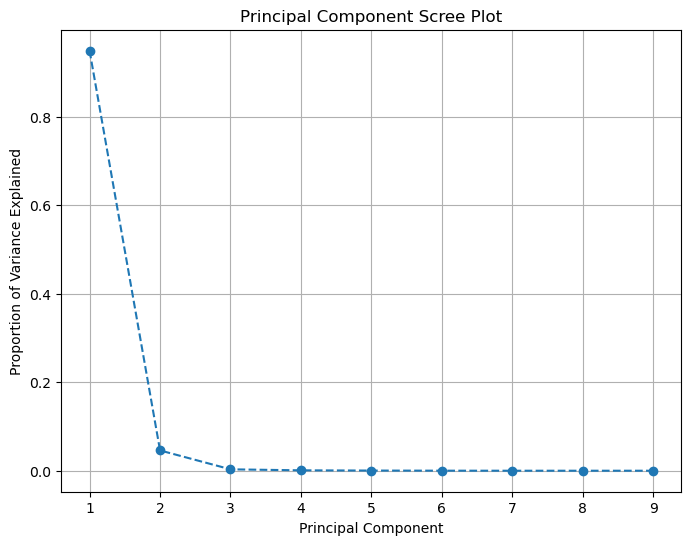

In [545]:
#Create Scree Plot
#Explained variance (proportion of variance captured by each component)
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Principal Component Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.savefig('PCA Scree Plot.png', dpi=300, bbox_inches='tight', format='png')
plt.show()


In [546]:
# Select the top k eigenvectors (for 2 principal components, k=2)
k = 2
principal_components = eigenvectors_sorted[:, 0:k]

# Project the data onto the principal components
projected_data = np.dot(X_train, principal_components)
# Convert projected data to DataFrame for plotting
projected_df = pd.DataFrame(projected_data, columns=[f'PC{i+1}' for i in range(k)])

print("\nProjected Data (First 2 Principal Components):")
print(projected_df)



Projected Data (First 2 Principal Components):
          PC1        PC2   
0    -248.210610  32.407985
1    -257.367101  57.242342
2    -280.104043  15.483419
3    -150.205489  27.058844
4     -64.158984  27.392547
...          ...        ...
2949 -304.166799  23.952921
2950 -344.521720  69.517598
2951 -145.316837  40.459723
2952 -128.336360  57.864920
2953 -269.365234  59.311594

[2954 rows x 2 columns]


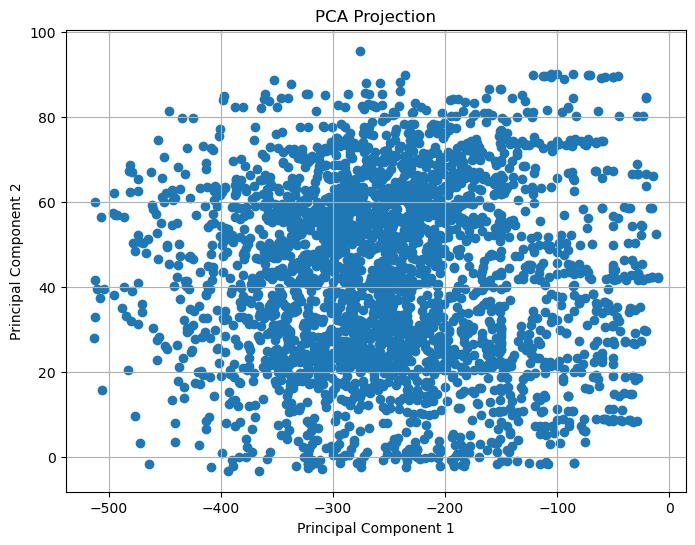

In [547]:
# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(projected_df['PC1'], projected_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)
plt.savefig('Covariance Matrix Heatmap.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

### Indirect Applicaton of PCA

In [548]:
# Project data onto principal components
X_pca = X_train.dot(eigenvectors[:, :2])
print(X_pca)

[[-248.21060951   32.40798547]
 [-257.36710098   57.24234169]
 [-280.10404295   15.48341919]
 ...
 [-145.31683678   40.45972261]
 [-128.33636011   57.86491997]
 [-269.36523392   59.3115938 ]]


### PCA Prjectoin Scatter Plot through Indirect PCA

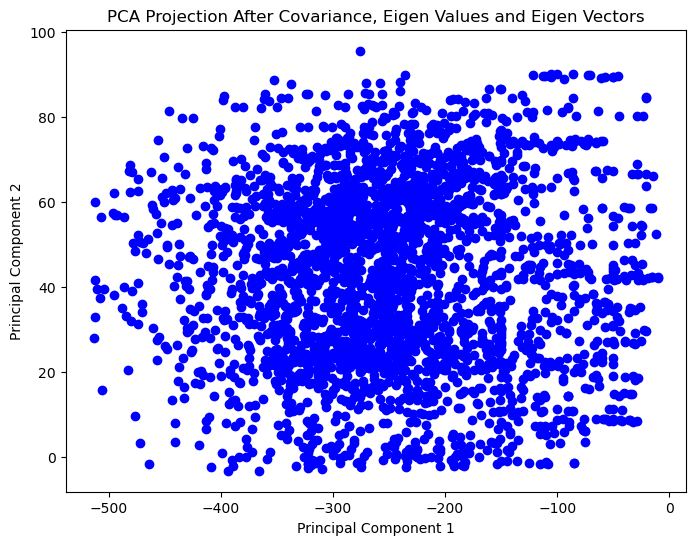

In [549]:
# Plot the projected data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection After Covariance, Eigen Values and Eigen Vectors')
plt.show()

## 2) Direct Method of PCA

In [550]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [551]:
print(X_train)
print("---------------------------------------------------------------------")
print(X_test)

[[   0.60806842  -10.34051231]
 [   9.76455989   14.49384392]
 [  32.50150186  -27.26507859]
 ...
 [-102.28570431   -2.28877516]
 [-119.26618099   15.11642219]
 [  21.76269283   16.56309603]]
---------------------------------------------------------------------
[[-32.50949164 -30.67203273]
 [-77.28470014   0.38950994]
 [-63.14684904  22.05444352]
 ...
 [221.91262585  24.42993466]
 [ 15.60959166 -10.54687578]
 [ 74.7575082   21.68548017]]


### Prjectoin Scatter Plot through Direct PC

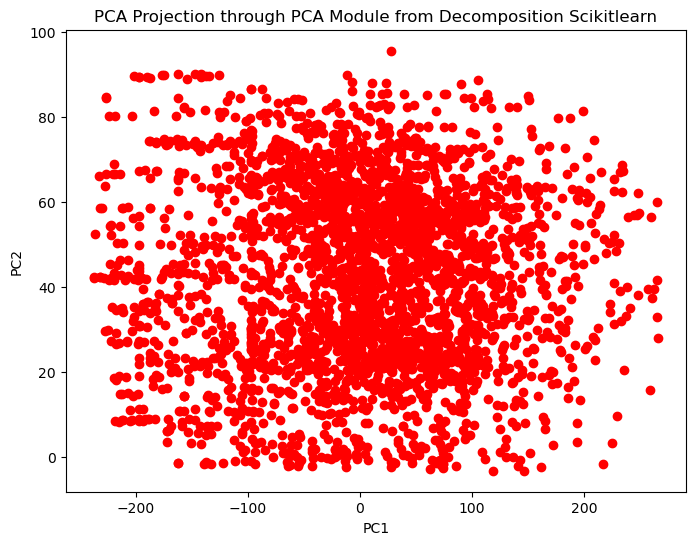

In [552]:
# Plot the projected data for training set 
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_pca[:, 1], c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection through PCA Module from Decomposition Scikitlearn')
plt.savefig('Covariance Matrix Heatmap.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

In [553]:
# Eigenvalues (explained variance)
explained_variance = pca.explained_variance_
print(explained_variance)

[9571.152622    462.41881754]


# Classification Object Creation, Implementation, Fitting, Confusion Matrices, Accuracy Scores

## Classifiers code

In [554]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=3, random_state = 0),
    'Random Forest': RandomForestClassifier(n_estimators = 500, criterion = 'entropy',bootstrap=True, random_state = 0),
    'GaussianNB': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state = 0),
    'SVC RBF': SVC(kernel = 'rbf', random_state = 0),
    'SVC Linear': SVC(kernel='linear',  random_state = 0),
    'K-Neighbors': KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2),
    'XGBoost': XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4)
}

# Train classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

## Cross Validation and Means Squared Error Scores

In [555]:
# Train classifiers and calculate cross-validation scores
mean_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_score = np.mean(scores)
    mean_scores[name] = mean_score

    # Predictions for MSE calculation
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse:.4f}, Mean CV Score = {mean_score:.4f}")

Decision Tree: Mean Squared Error = 0.2963, Mean CV Score = 0.7150
Random Forest: Mean Squared Error = 0.2991, Mean CV Score = 0.6727
GaussianNB: Mean Squared Error = 0.3058, Mean CV Score = 0.7102
Logistic Regression: Mean Squared Error = 0.3180, Mean CV Score = 0.7035
SVC RBF: Mean Squared Error = 0.3004, Mean CV Score = 0.7146
SVC Linear: Mean Squared Error = 0.3139, Mean CV Score = 0.7109
K-Neighbors: Mean Squared Error = 0.3302, Mean CV Score = 0.6787
XGBoost: Mean Squared Error = 0.3126, Mean CV Score = 0.6808


## Visualizing the Mean Cross Validation Score and Mean Squared Error

In [556]:
data_mse_cv = {
    'Model': ['Decision Tree', 'Random Forest', 'GaussianNB', 'Logistic Regression', 'SVC RBF', 'SVC Linear', 'K-Neighbors', 'XGBoost'],
    'Mean Squared Error': [0.2963, 0.2991, 0.3058, 0.3180, 0.3004, 0.3139, 0.3302, 0.3126],
    'Mean CV Score': [0.7150, 0.6727, 0.7102, 0.7035, 0.7146, 0.7102, 0.6787, 0.6808]
}

# Convert to DataFrame
df_mse_cv = pd.DataFrame(data_mse_cv)

# Sort the DataFrame by any chosen metric, for example, by 'F1 Score'
df_mse_cv_sorted = df_mse_cv.sort_values(by=['Mean CV Score'], ascending=False)

# Print the sorted DataFrame
print(df_mse_cv_sorted)

         Model          Mean Squared Error  Mean CV Score
0        Decision Tree        0.2963           0.7150    
4              SVC RBF        0.3004           0.7146    
2           GaussianNB        0.3058           0.7102    
5           SVC Linear        0.3139           0.7102    
3  Logistic Regression        0.3180           0.7035    
7              XGBoost        0.3126           0.6808    
6          K-Neighbors        0.3302           0.6787    
1        Random Forest        0.2991           0.6727    


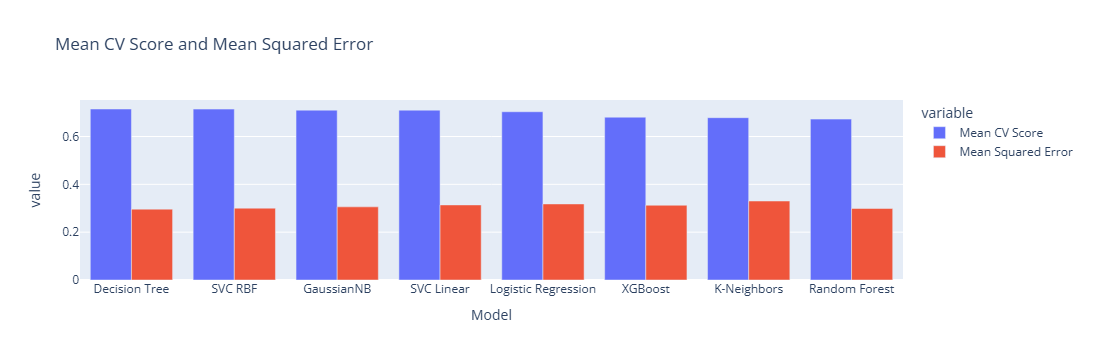

In [593]:
import plotly.express as px

# Plot the sorted DataFrame
fig = px.bar(df_mse_cv_sorted, x='Model', y=['Mean CV Score', 'Mean Squared Error'], barmode='group', title="Mean CV Score and Mean Squared Error")

# Show the interactive plot
fig.show()
fig.write_html("Mean CV Score and Mean Squared Error.html")


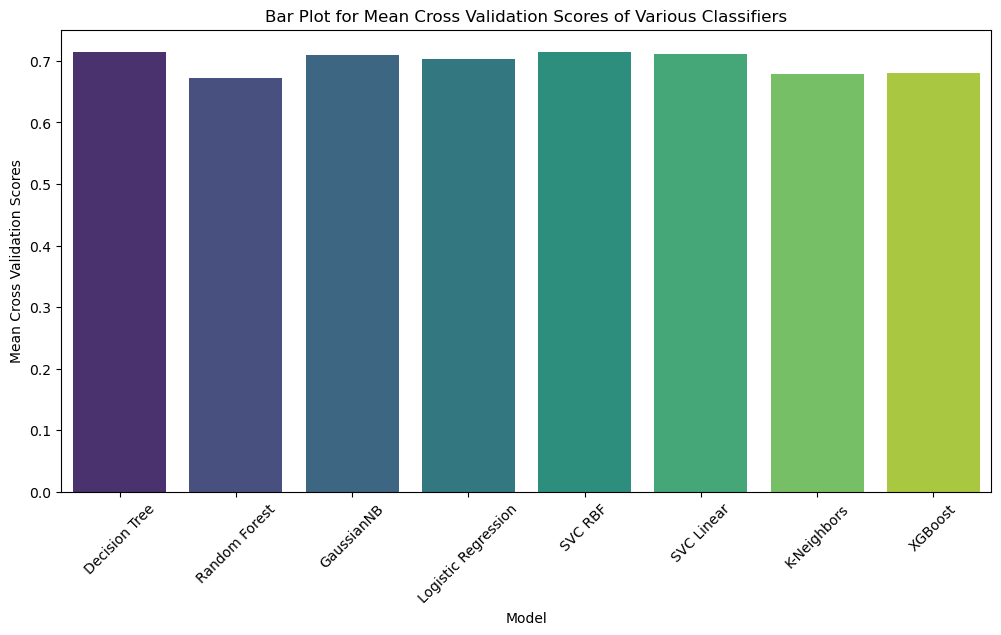

In [558]:
mean_cv_scores = {
    'Decision Tree': 0.7150,
    'Random Forest': 0.6727,
    'GaussianNB': 0.7102,
    'Logistic Regression': 0.7035,
    'SVC RBF': 0.7146,
    'SVC Linear': 0.7106,
    'K-Neighbors': 0.6787,
    'XGBoost': 0.6808
}

# Create a DataFrame from the mean scores for easy plotting
mean_cv_scores_df = pd.DataFrame(list(mean_cv_scores.items()), columns=['Model', 'Mean Cross Validation Scores'])

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean Cross Validation Scores', data=mean_cv_scores_df, palette='viridis', hue='Model', dodge=False)
plt.legend([],[], frameon=False)  # Hide the legend
plt.title('Bar Plot for Mean Cross Validation Scores of Various Classifiers')
plt.xticks(rotation=45)
plt.savefig('mean_scores1.png', dpi=300, bbox_inches='tight', format='png')
plt.show()



## Confusion Matrices for all Classifiers

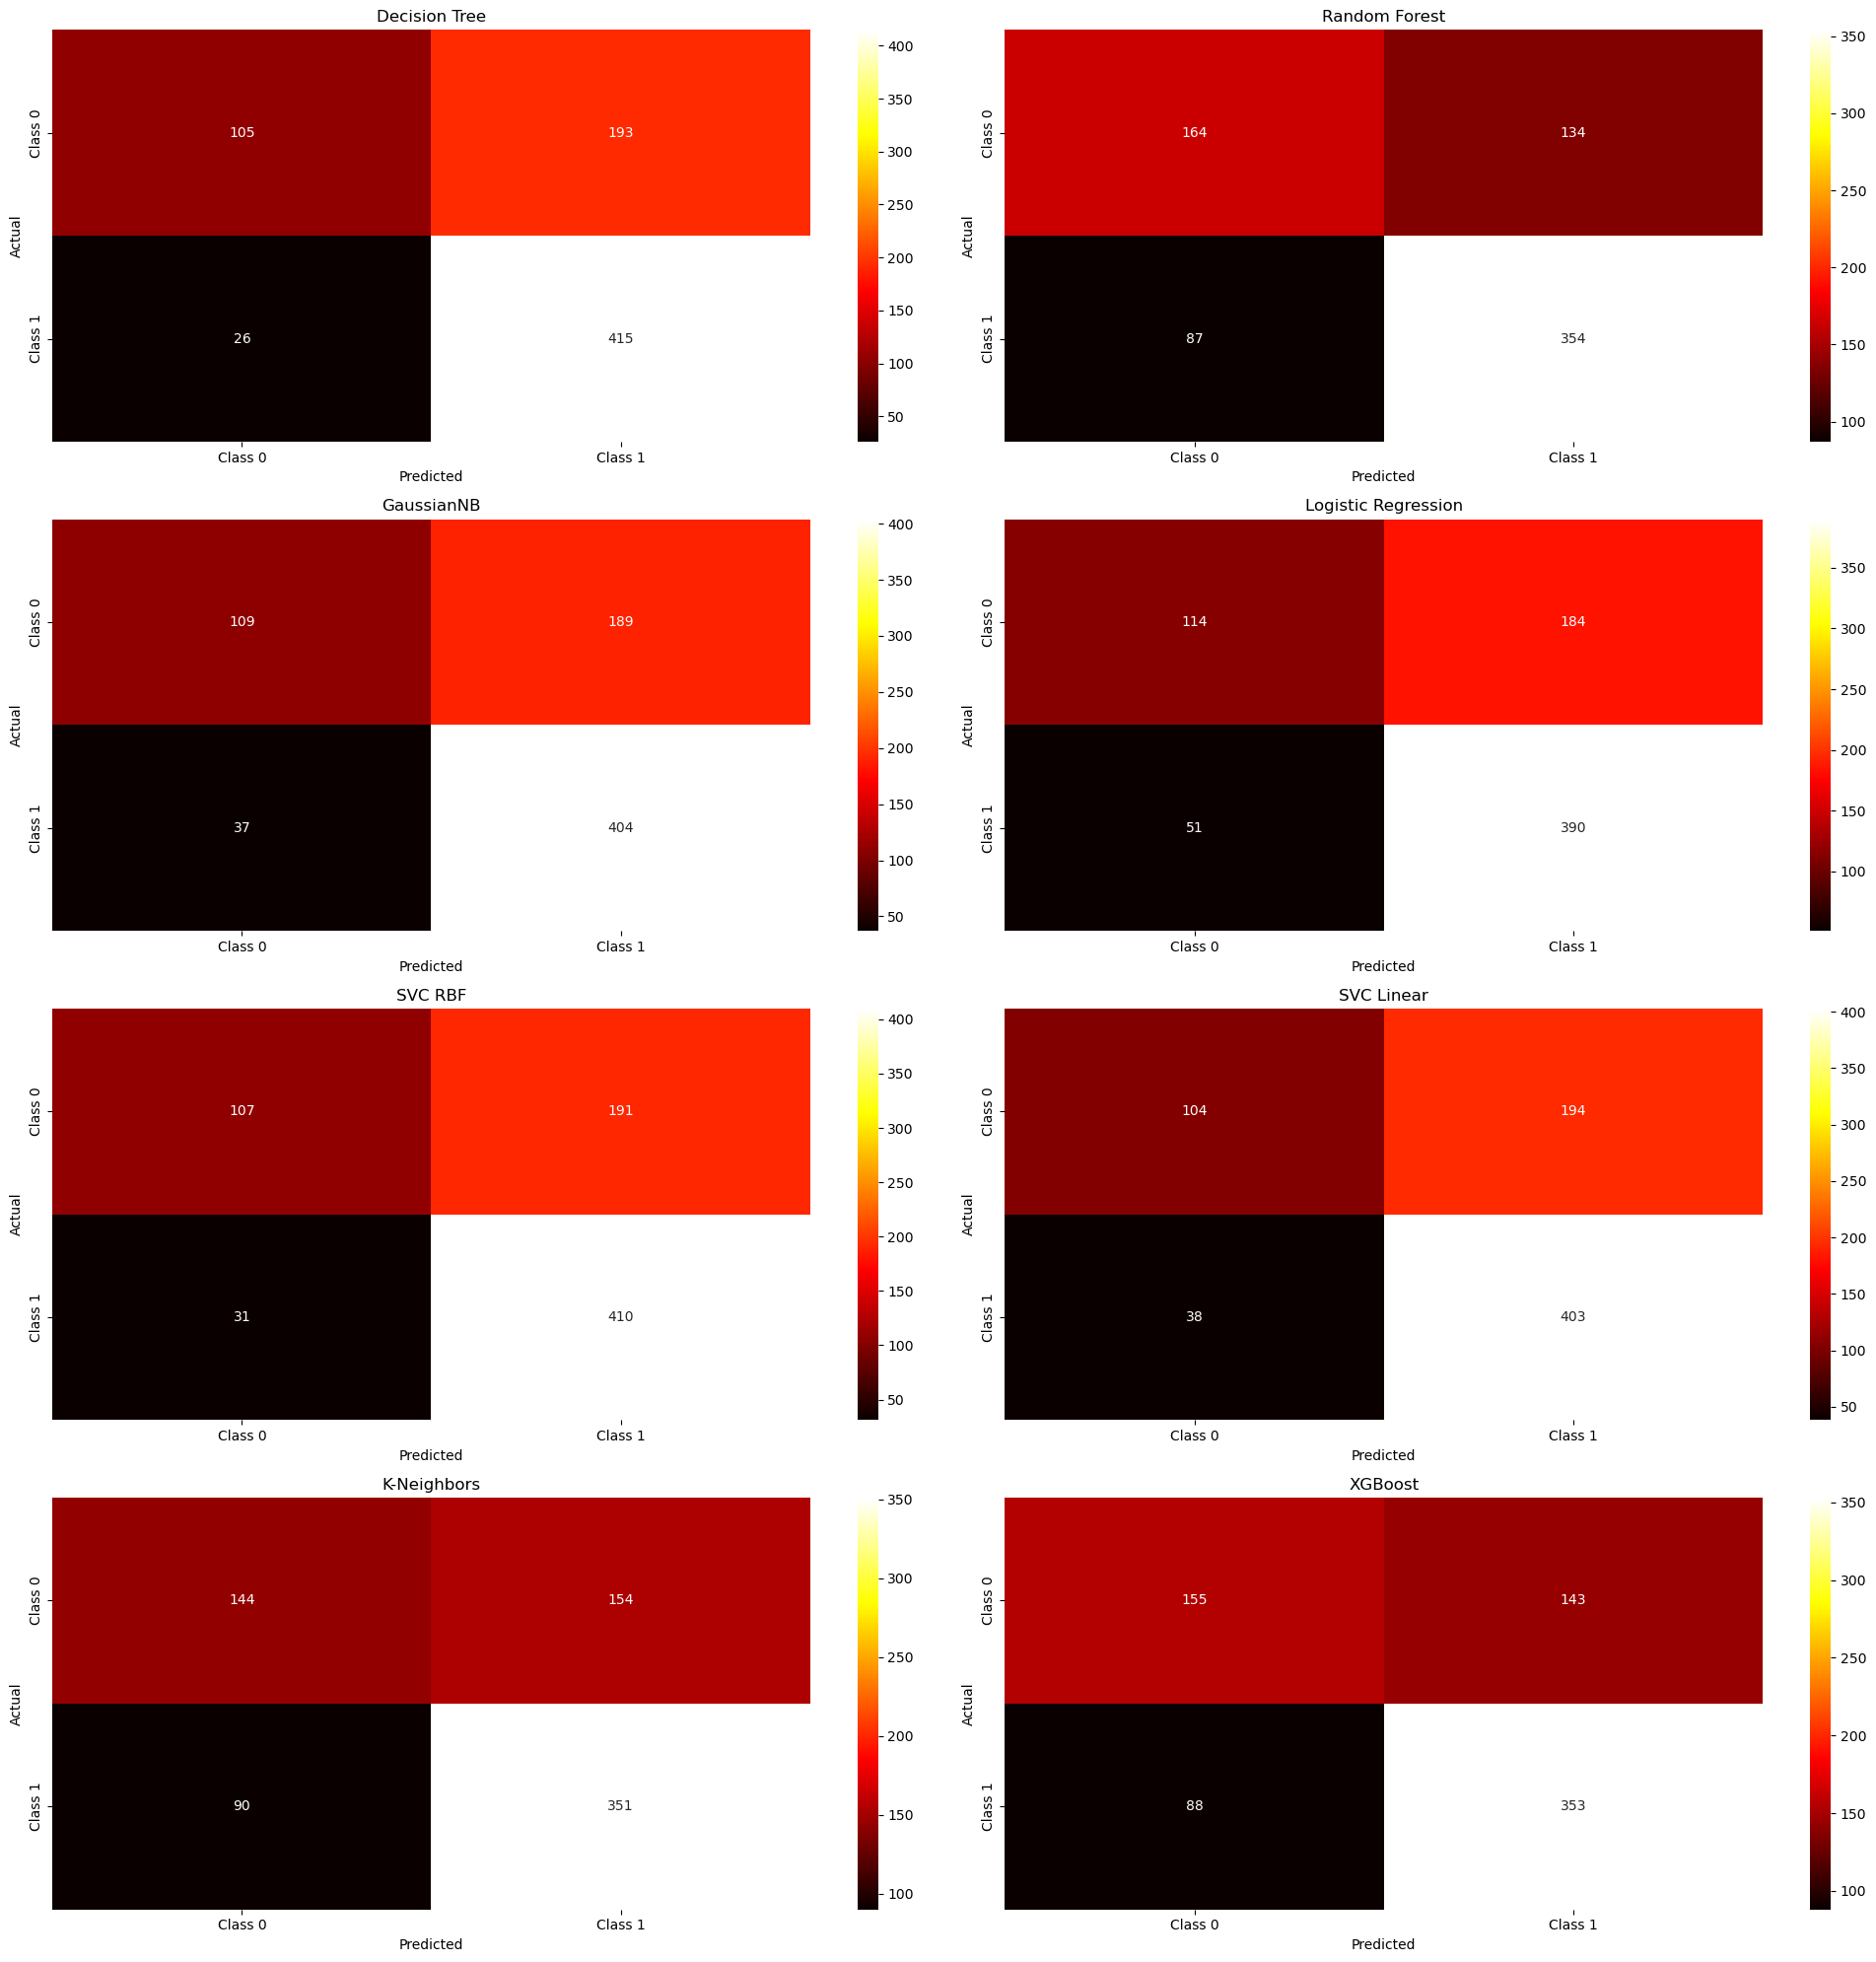

In [559]:
# Plot confusion matrices
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # Adjust the grid size as necessary
axes = axes.flatten()

for ax, (name, clf) in zip(axes, classifiers.items()):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='hot', ax=ax, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Remove any empty subplots
for i in range(len(classifiers), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.savefig('confusionmatrix1.png', dpi=300, bbox_inches='tight',format='png')
plt.show()

## Confustion Matrices Accuracy Scores

In [560]:
def scores(classifiers, X_test, y_test):
    
    for name, clf in classifiers.items():
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy:", accuracy)

        # Calculate precision score
        precision = precision_score(y_test, y_pred, average='binary')
        print(f"{name} Precision:", precision)

        # Calculate recall score
        recall = recall_score(y_test, y_pred, average='binary')
        print(f"{name} Recall:", recall)

        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='binary')
        print(f"{name} F1 Score:", f1)
        
        # Fit classifiers
        for name, clf in classifiers.items():
            clf.fit(X_train, y_train)

# Calculate scores for each classifier
scores(classifiers, X_test, y_test)

Decision Tree Accuracy: 0.7036535859269283
Decision Tree Precision: 0.6825657894736842
Decision Tree Recall: 0.9410430839002267
Decision Tree F1 Score: 0.7912297426120114
Random Forest Accuracy: 0.7009472259810555
Random Forest Precision: 0.7254098360655737
Random Forest Recall: 0.8027210884353742
Random Forest F1 Score: 0.7621097954790097
GaussianNB Accuracy: 0.6941813261163735
GaussianNB Precision: 0.6812816188870152
GaussianNB Recall: 0.9160997732426304
GaussianNB F1 Score: 0.781431334622824
Logistic Regression Accuracy: 0.6820027063599459
Logistic Regression Precision: 0.6794425087108014
Logistic Regression Recall: 0.8843537414965986
Logistic Regression F1 Score: 0.7684729064039408
SVC RBF Accuracy: 0.699594046008119
SVC RBF Precision: 0.6821963394342762
SVC RBF Recall: 0.9297052154195011
SVC RBF F1 Score: 0.7869481765834933
SVC Linear Accuracy: 0.6860622462787551
SVC Linear Precision: 0.6750418760469011
SVC Linear Recall: 0.9138321995464853
SVC Linear F1 Score: 0.7764932562620424


In [561]:
data_metrices = {
    'Model': ['Decision Tree', 'Random Forest', 'GaussianNB', 'Logistic Regression', 'SVC RBF', 'SVC Linear', 'K-Neighbors', 'XGBoost'],
    'Accuracy': [0.7036535859269283, 0.7009472259810555, 0.6941813261163735, 0.6820027063599459, 0.699594046008119, 0.6860622462787551, 0.6698240866035182, 0.6874154262516915],
    'Precision': [0.6825657894736842, 0.7254098360655737, 0.6812816188870152, 0.6794425087108014, 0.6821963394342762, 0.6750418760469011, 0.695049504950495, 0.7116935483870968],
    'Recall': [0.9410430839002267, 0.8027210884353742, 0.9160997732426304, 0.8843537414965986, 0.9297052154195011, 0.9138321995464853, 0.7959183673469388, 0.800453514739229],
    'F1 Score': [0.7912297426120114, 0.7621097954790097, 0.781431334622824, 0.7684729064039408, 0.7869481765834933, 0.7764932562620424, 0.7420718816067653, 0.7534685165421559]
}

# Convert to DataFrame
df_am = pd.DataFrame(data_metrices)

# Sort the DataFrame by any chosen metric, for example, by 'F1 Score'
df_am_sorted = df_am.sort_values(by=['F1 Score'], ascending=False)

# Print the sorted DataFrame
print(df_am_sorted)

         Model          Accuracy  Precision   Recall   F1 Score
0        Decision Tree  0.703654  0.682566   0.941043  0.791230
4              SVC RBF  0.699594  0.682196   0.929705  0.786948
2           GaussianNB  0.694181  0.681282   0.916100  0.781431
5           SVC Linear  0.686062  0.675042   0.913832  0.776493
3  Logistic Regression  0.682003  0.679443   0.884354  0.768473
1        Random Forest  0.700947  0.725410   0.802721  0.762110
7              XGBoost  0.687415  0.711694   0.800454  0.753469
6          K-Neighbors  0.669824  0.695050   0.795918  0.742072


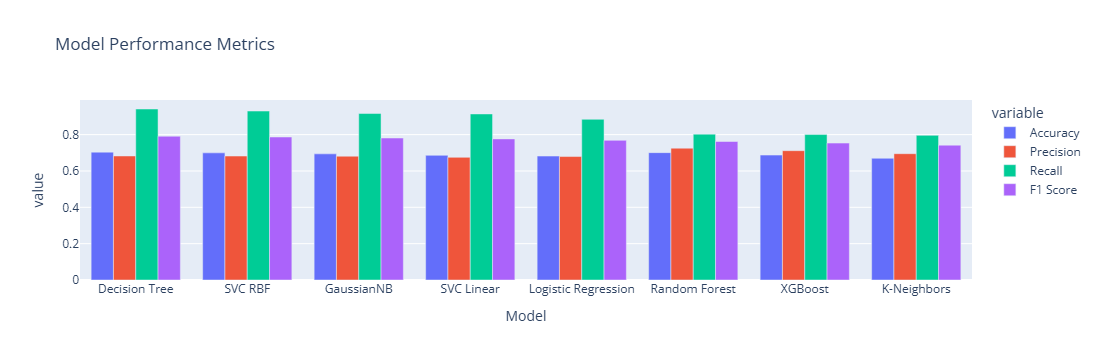

In [562]:
import plotly.express as px

# Plot the sorted DataFrame
fig = px.bar(df_am_sorted, x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], barmode='group', title="Model Performance Metrics")

# Show the interactive plot
fig.show()
fig.write_html("model_performance_metrics2.html")


## Decision Tree and Random Forest 

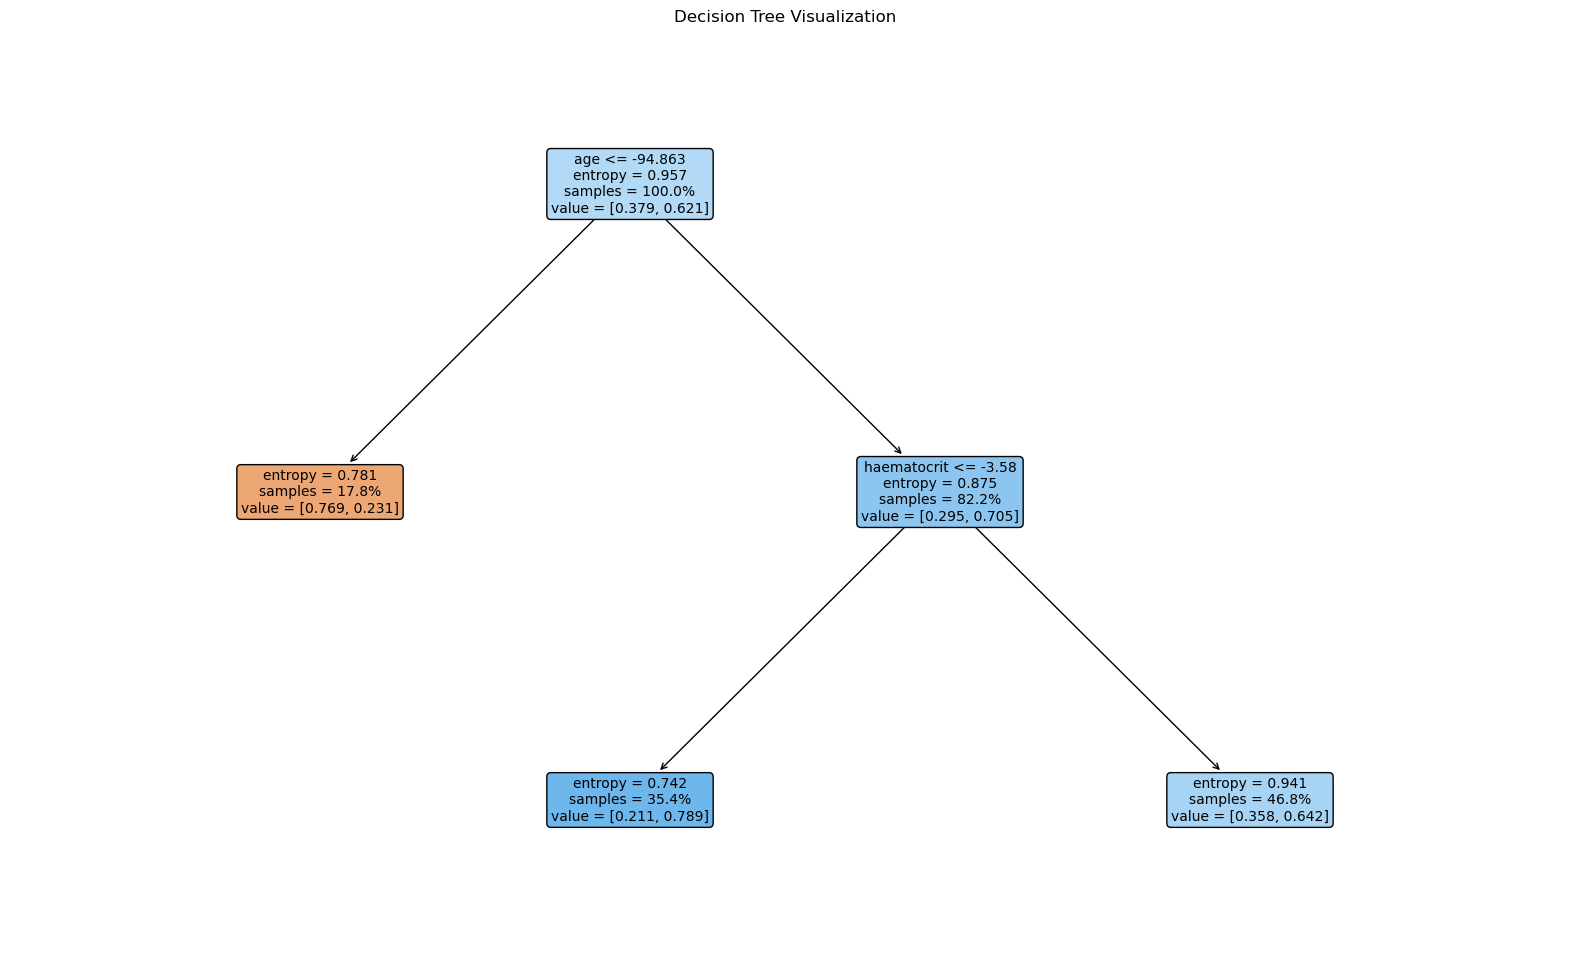

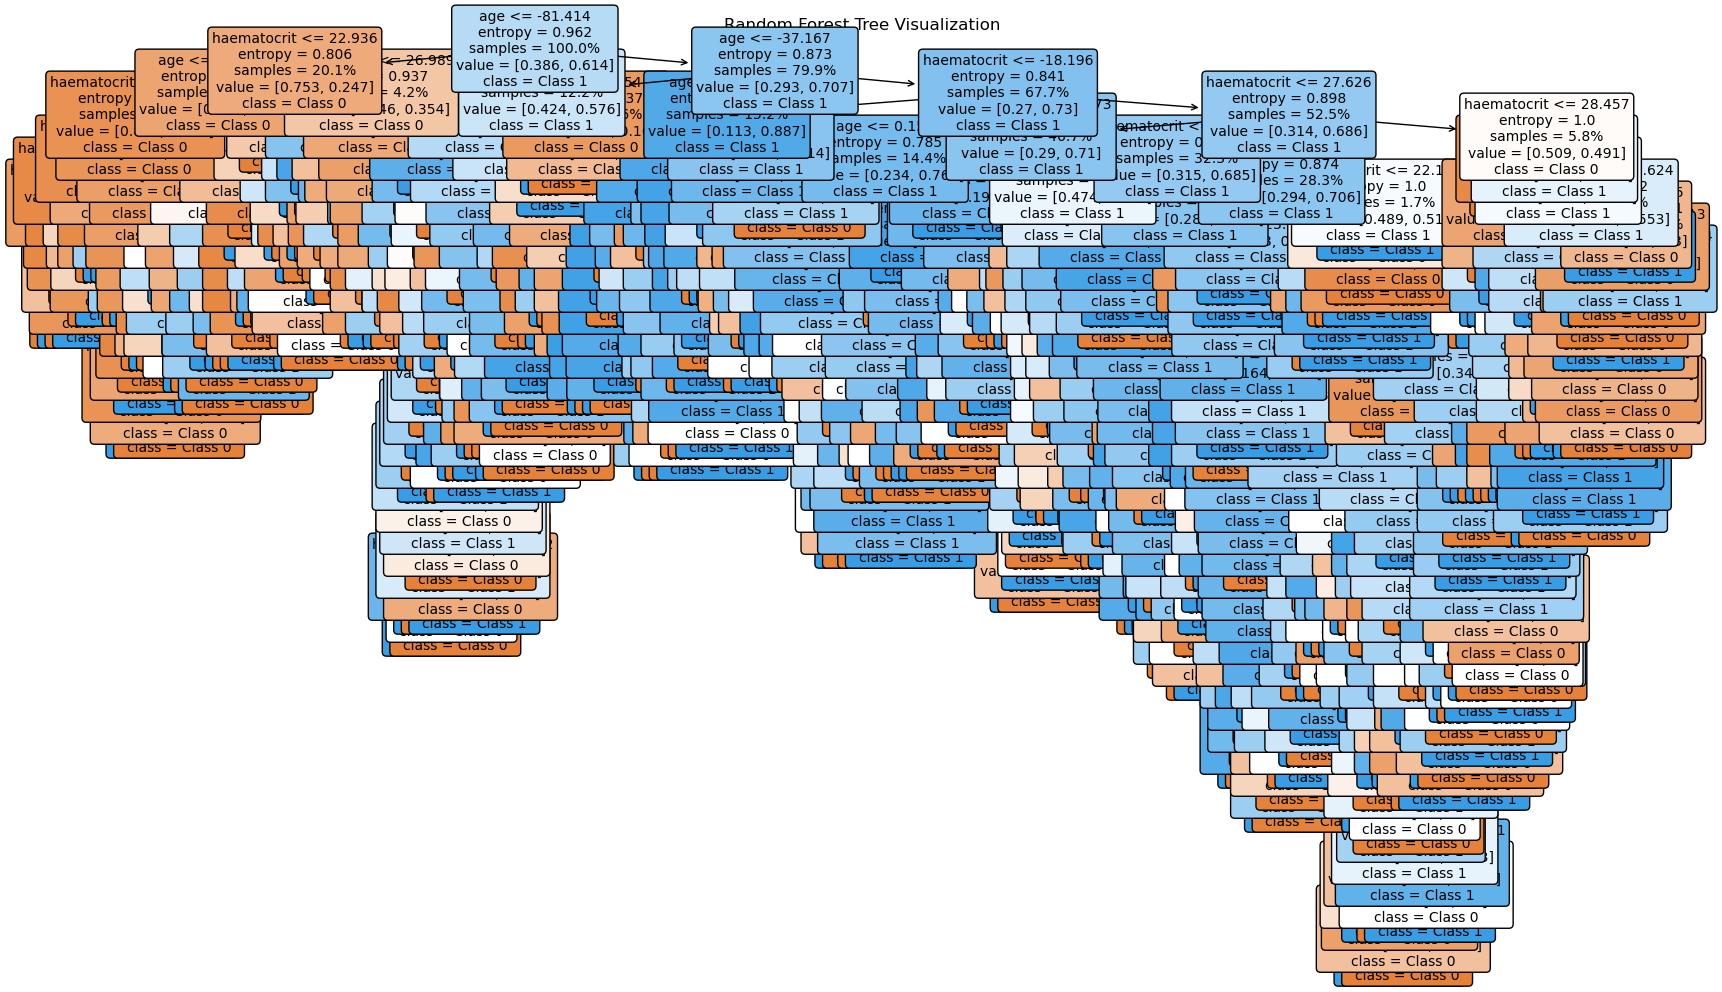

In [563]:
fig=plt.figure(figsize=(20,12))

# List of feature names should be passed as a list, not as a single string
feature_names = ['age', 'haematocrit', 'haemoglobins', 'erythrocyte', 
                 'leucocyte', 'thrombocyte', 'mch', 'mchc', 'mcv']

plot_tree(classifiers['Decision Tree'], filled=True, rounded=True, feature_names=feature_names, fontsize=10, proportion=True)
plt.title("Decision Tree Visualization")
plt.savefig('decisiontree1.png', dpi=300, bbox_inches='tight', format='png')
plt.savefig('decisiontree2.svg', dpi=300, bbox_inches='tight', format='svg')
# Plot Random Forest 
plt.figure(figsize=(20, 12))
plot_tree(classifiers['Random Forest'].estimators_[0], filled=True, rounded=True, class_names=['Class 0', 'Class 1'], 
          feature_names=feature_names, fontsize=10, proportion=True)
plt.title("Random Forest Tree Visualization")
plt.savefig('randomforest1.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

## Visualizing the Training Set Result 

### Visualizing the Training Set for Random Forest

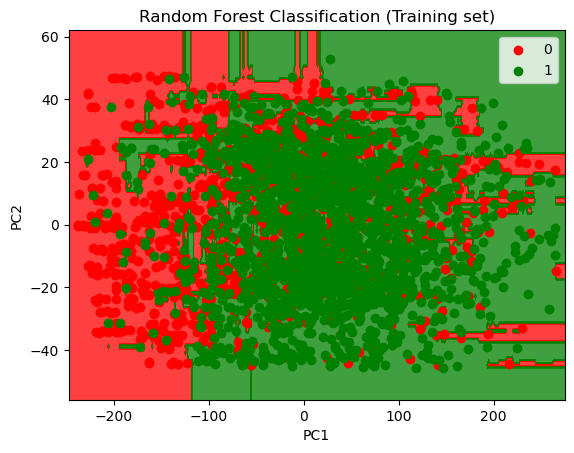

In [564]:
clf1 = RandomForestClassifier(n_estimators=500, criterion='entropy', bootstrap=True, random_state=0)
clf1.fit(X_train, y_train)

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)

Z_rfc=clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_rfc, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('rfc.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

### Visualizing the Training Set for XGBoost 

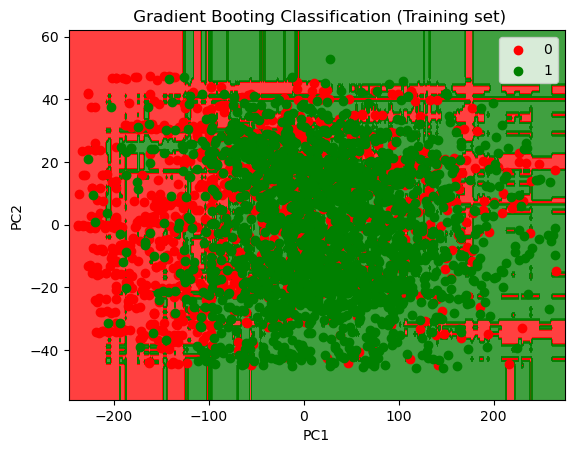

In [565]:
clf2 = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4)
clf2.fit(X_train, y_train)

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_xgb=clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_xgb, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Gradient Booting Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('xgb.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

There are two regions in the graph. The Green region represent the inpatient treatement and red show the outpatient treatment. Although, the both regions are densly populated with no clear separation or decision boundry, however, it do reveals that green dots in the green region are True Positive and red dots in the red region are truly negative. Whereas, green dots in region represnt patients who were predicted to be outpatients but actually were in patients. Similarly, red spots in green region were patients who were predicted to in patients, but actually are outpatients. 

### Visualizing the Training Set for Decesion Tree

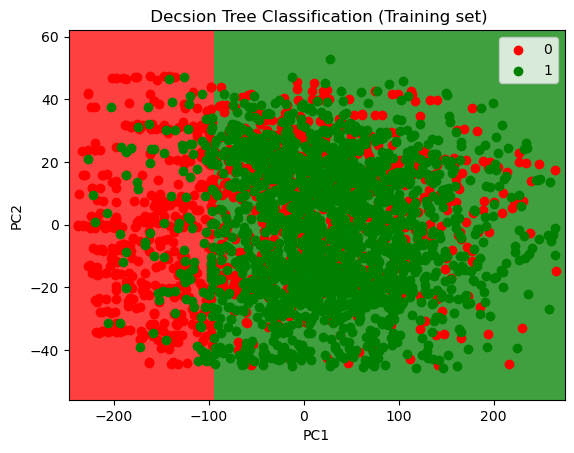

In [566]:
clf3 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=3, random_state = 0)
clf3.fit(X_train, y_train)

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_dtc=clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_dtc, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Decsion Tree Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('dtc.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

There are two regions in the graph. The Green region represent the inpatient treatement and red show the outpatient treatment. Although, the both regions are densly populated with no clear separation or decision boundry, however, it do reveals that green dots in the green region are True Positive and red dots in the red region are truly negative. Whereas, green dots in region represnt patients who were predicted to be outpatients but actually were in patients. Similarly, red spots in green region were patients who were predicted to in patients, but actually are outpatients. The accuracy result for Decison Tree is less than for Random Forest and XG Boost.

### Visualizing the Training Set for Support Vector Classification (RBF)

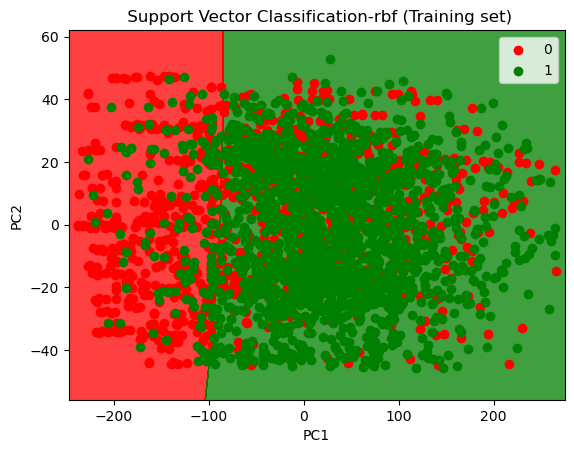

In [567]:
clf4 = SVC(kernel = 'rbf', random_state = 0)
clf4.fit(X_train, y_train)

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_svcr=clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_svcr, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Support Vector Classification-rbf (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('svcr.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

### Visualizing the Training Set for Support Vector Classificatoin (Liner)

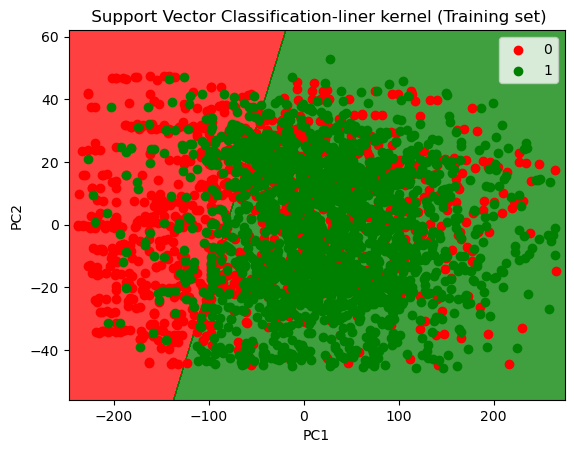

In [568]:
clf5 = SVC(kernel='linear',  random_state = 0)
clf5.fit(X_train, y_train)

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_l=clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_l, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Support Vector Classification-liner kernel (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('svcl.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

## Visualizing the Test Set Result

### Visuzlizing the Test Set for Random Forest

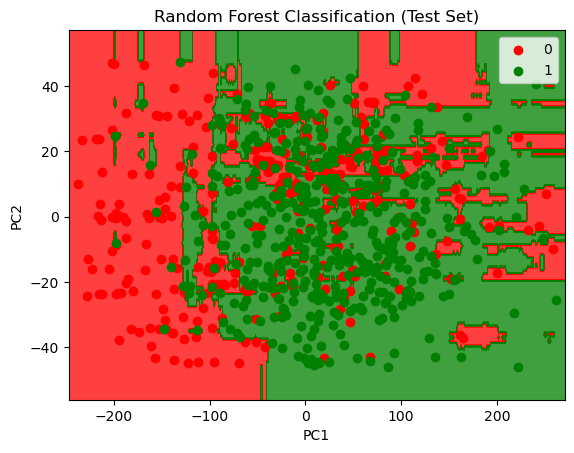

In [569]:
clf6 = RandomForestClassifier(n_estimators=500, criterion='entropy', bootstrap=True, random_state=0)
clf6.fit(X_test, y_test)

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)

Z_rfc6=clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_rfc6, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('rfct.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

There are two regions in the graph. The Green region represent the inpatient treatement and red show the outpatient treatment. Although, the both regions are densly populated with no clear separation or decision boundry, however, it do reveals that green dots in the green region are True Positive and red dots in the red region are truly negative. Whereas, green dots in region represnt patients who were predicted to be outpatients but actually were in patients. Similarly, red spots in green region were patients who were predicted to in patients, but actually are outpatients. 

### Visualizing the Test Set for XG Boost

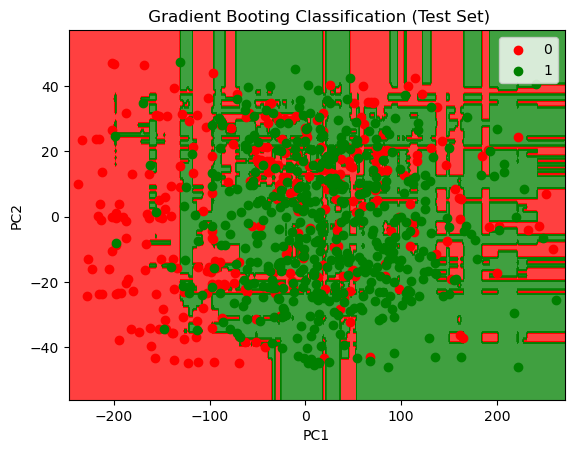

In [570]:
clf7 = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4)
clf7.fit(X_test, y_test)

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_xgb7=clf7.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_xgb7, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Gradient Booting Classification (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('xgbt.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

There are two regions in the graph. The Green region represent the inpatient treatement and red show the outpatient treatment. Although, the both regions are densly populated with no clear separation or decision boundry, however, it do reveals that green dots in the green region are True Positive and red dots in the red region are truly negative. Whereas, green dots in region represnt patients who were predicted to be outpatients but actually were in patients. Similarly, red spots in green region were patients who were predicted to in patients, but actually are outpatients. 

### Visualizing the Test Set for Decision Tree

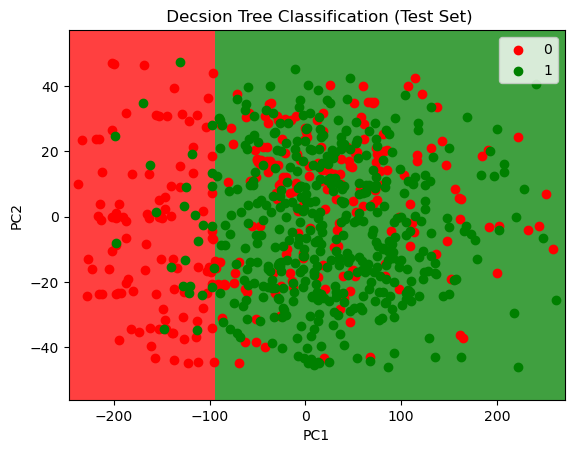

In [571]:
clf8 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=3, random_state = 0)
clf8.fit(X_test, y_test)

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_dtc8=clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_dtc8, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Decsion Tree Classification (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('dtct.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

There are two regions in the graph. The Green region represent the inpatient treatement and red show the outpatient treatment. Here for Test Set, there exist somewhat clear decision boundry which is not much densly populated; however, it do reveals that green dots in the green region are True Positive and red dots in the red region are truly negative. Whereas, green dots in region represnt patients who were predicted to be outpatients but actually were in patients. Similarly, red spots in green region were patients who were predicted to in patients, but actually are outpatients. However the reslt for Decsion Tree Classification for Training Set and Test Set are less accurate than for Random Forest and XG Boost.

### Visualizing the Test Set for Support Vector Classiciation-rbf Kernel

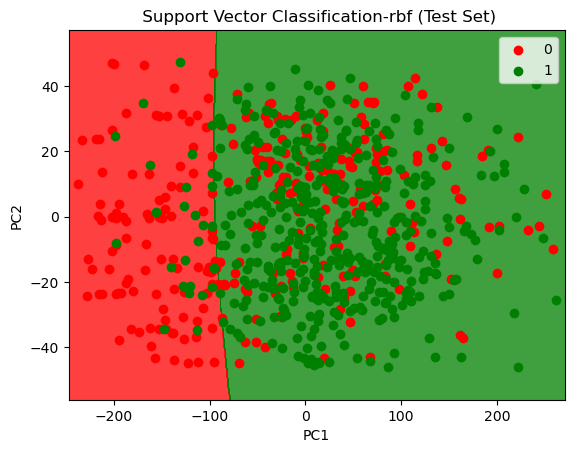

In [572]:
clf9 = SVC(kernel = 'rbf', random_state = 0)
clf9.fit(X_test, y_test)

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_svcr9=clf9.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_svcr9, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Support Vector Classification-rbf (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('svcrt.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

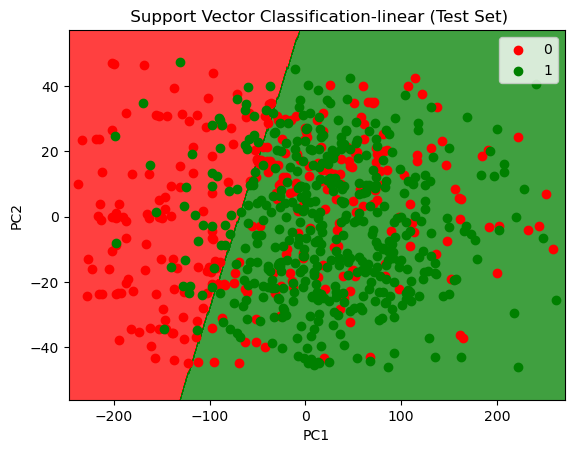

In [573]:
clf10 = SVC(kernel = 'linear', random_state = 0)
clf10.fit(X_test, y_test)

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=1)
)


Z_svcr10=clf10.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z_svcr10, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title(' Support Vector Classification-linear (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('svcrlt.png', dpi=300, bbox_inches='tight', format='png')
plt.show()